##Exercício 2

### Exemplo na seção 8.1 na referência (feito até 10.7.3)

In [ ]:
!pip install plotnine adjustText gapminder pyreadr

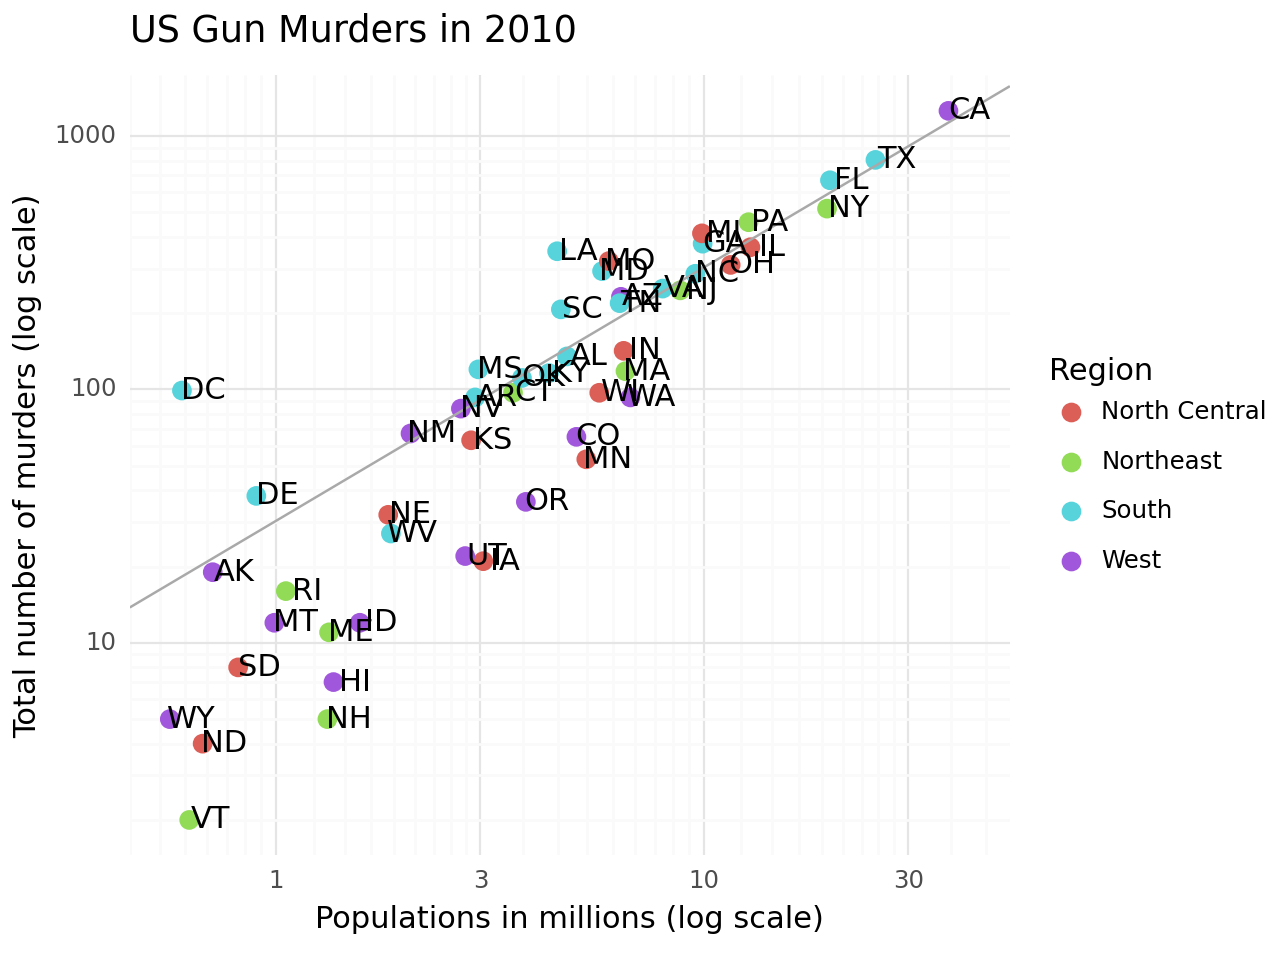

<Figure Size: (640 x 480)>

In [ ]:
import plotnine as pln
import plotnine.data as pld
import plotnine.themes as plnt
import pandas as pd
import numpy as np

murders = pd.read_csv("https://www.dca.fee.unicamp.br/cursos/IA376I/datasets/murders.csv")

r = np.sum(murders["total"]) / np.sum(murders["population"]) * 10**6

(
    pln.ggplot(murders, pln.aes("population/10**6", "total", label = "abb")) +
    pln.geom_point(pln.aes(color="region"), size=3) +
    # O paramentro 'lty' não existe no plotnine
    pln.geom_abline(intercept=np.log10(r),  color="darkgrey") +
    # geom_text_rapel não existe no plotnine
    pln.geom_text(nudge_x = 0.05) +
    pln.scale_x_log10() +
    pln.scale_y_log10() +
    pln.xlab("Populations in millions (log scale)") +
    pln.ylab("Total number of murders (log scale)") +
    pln.ggtitle("US Gun Murders in 2010") +
    pln.scale_color_discrete(name = "Region") +
    # O tema economist não está presente no plotnine
    plnt.theme_minimal()
)

###   exemplo explorado na Seção 3.5.3.

In [ ]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv")

ideal = diamonds[diamonds["cut"] == "Ideal"]
premium = diamonds[diamonds["cut"] == "Premium"]
algebra = diamonds[["carat", "cut", "price"]]
print(ideal)
print(premium)
print(algebra)

       carat    cut color clarity  depth  table  price     x     y     z
0       0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
11      0.23  Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
13      0.31  Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
16      0.30  Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
39      0.33  Ideal     I     SI2   61.8   55.0    403  4.49  4.51  2.78
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
53925   0.79  Ideal     I     SI1   61.6   56.0   2756  5.95  5.97  3.67
53926   0.71  Ideal     E     SI1   61.9   56.0   2756  5.71  5.73  3.54
53929   0.71  Ideal     G     VS1   61.4   56.0   2756  5.76  5.73  3.53
53935   0.72  Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53939   0.75  Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[21551 rows x 10 columns]
       carat      cut color clarity  depth  table  price     x     y     z
1       0.21  Premium 

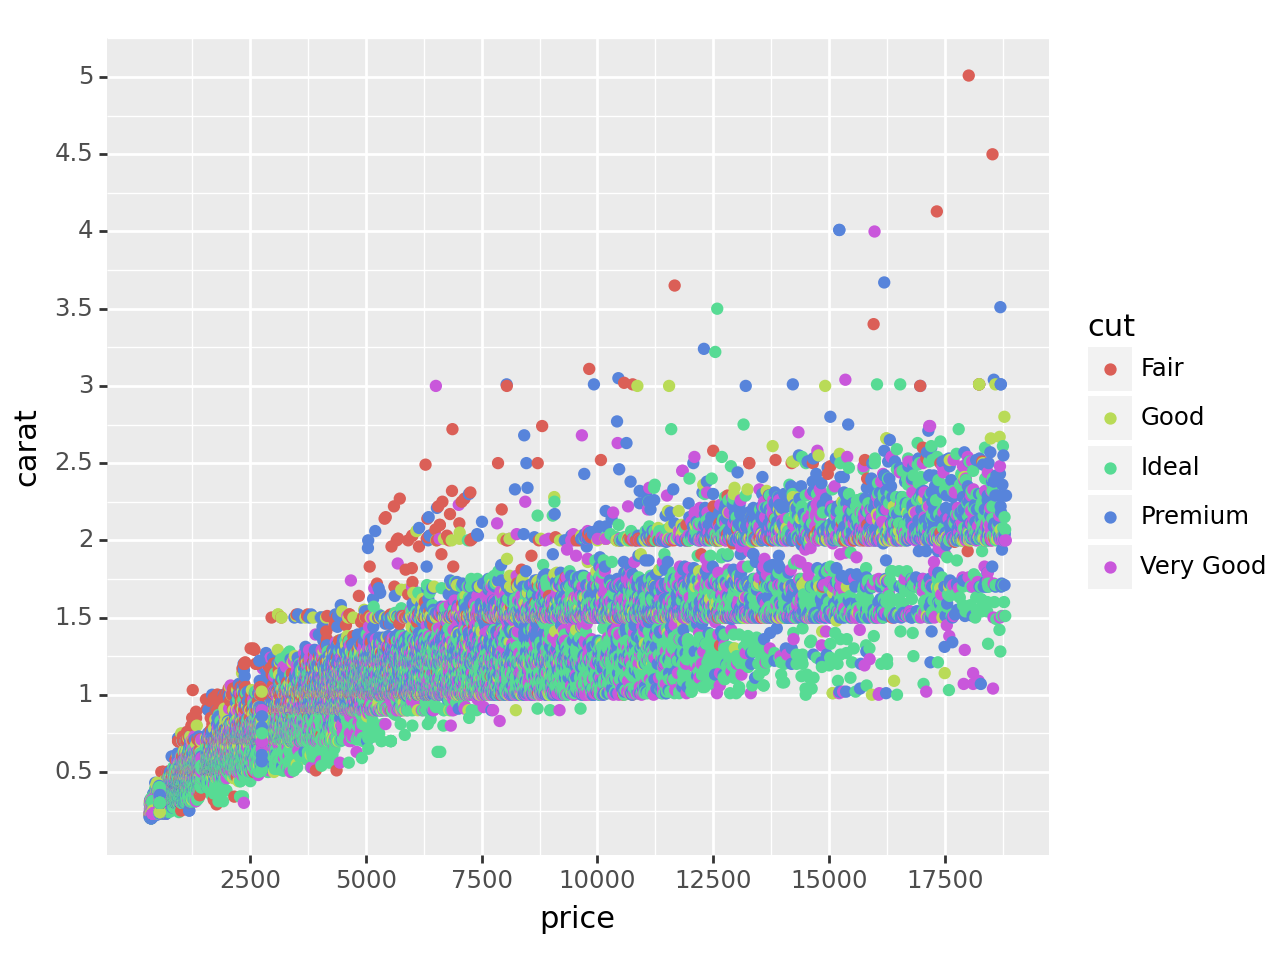

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(algebra) +
    pln.geom_point(pln.aes("price", "carat", color="cut")) +
    pln.scale_x_continuous (breaks=range(2500,20000,2500)) +
    pln.scale_y_continuous (breaks=np.linspace(0.5,5,10))
)

In [ ]:
print('u_carat =', algebra['carat'].mean())
print('sd_carat =', algebra['carat'].std())
print('Md_carat =', algebra['carat'].median())

print('u_price = U$', algebra['price'].mean())
print('sd_price = U$', algebra['price'].std())
print('Md_price = u$', algebra['price'].median())

u_carat = 0.7979397478680014
sd_carat = 0.4740112444054184
Md_carat = 0.7
u_price = U$ 3932.799721913237
sd_price = U$ 3989.439738146379
Md_price = u$ 2401.0


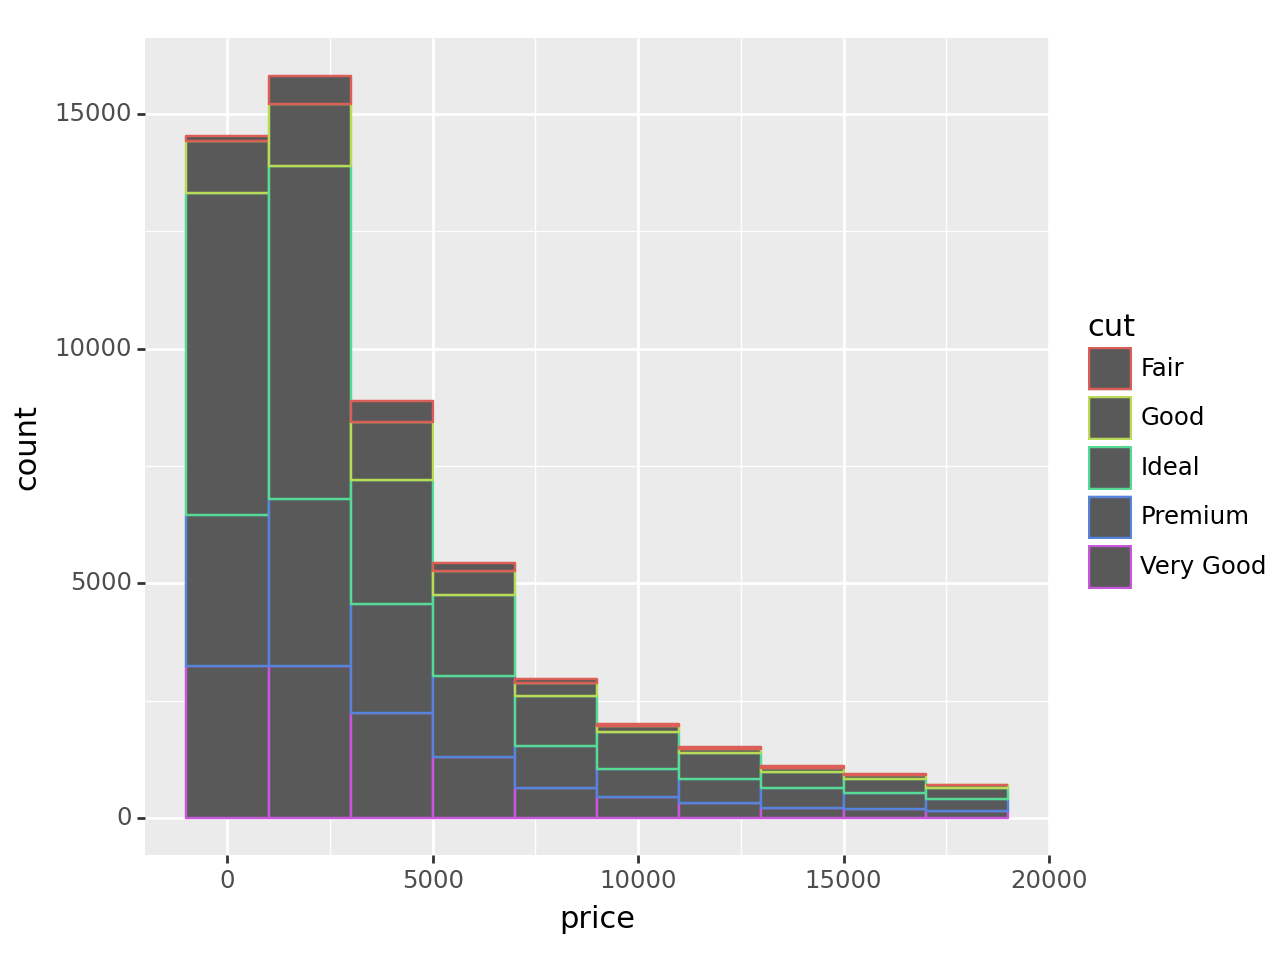

<Figure Size: (640 x 480)>

In [ ]:
pln.ggplot (data = algebra) + pln.geom_histogram (mapping = pln.aes(x=algebra['price'], color = algebra['cut']), binwidth=2000)

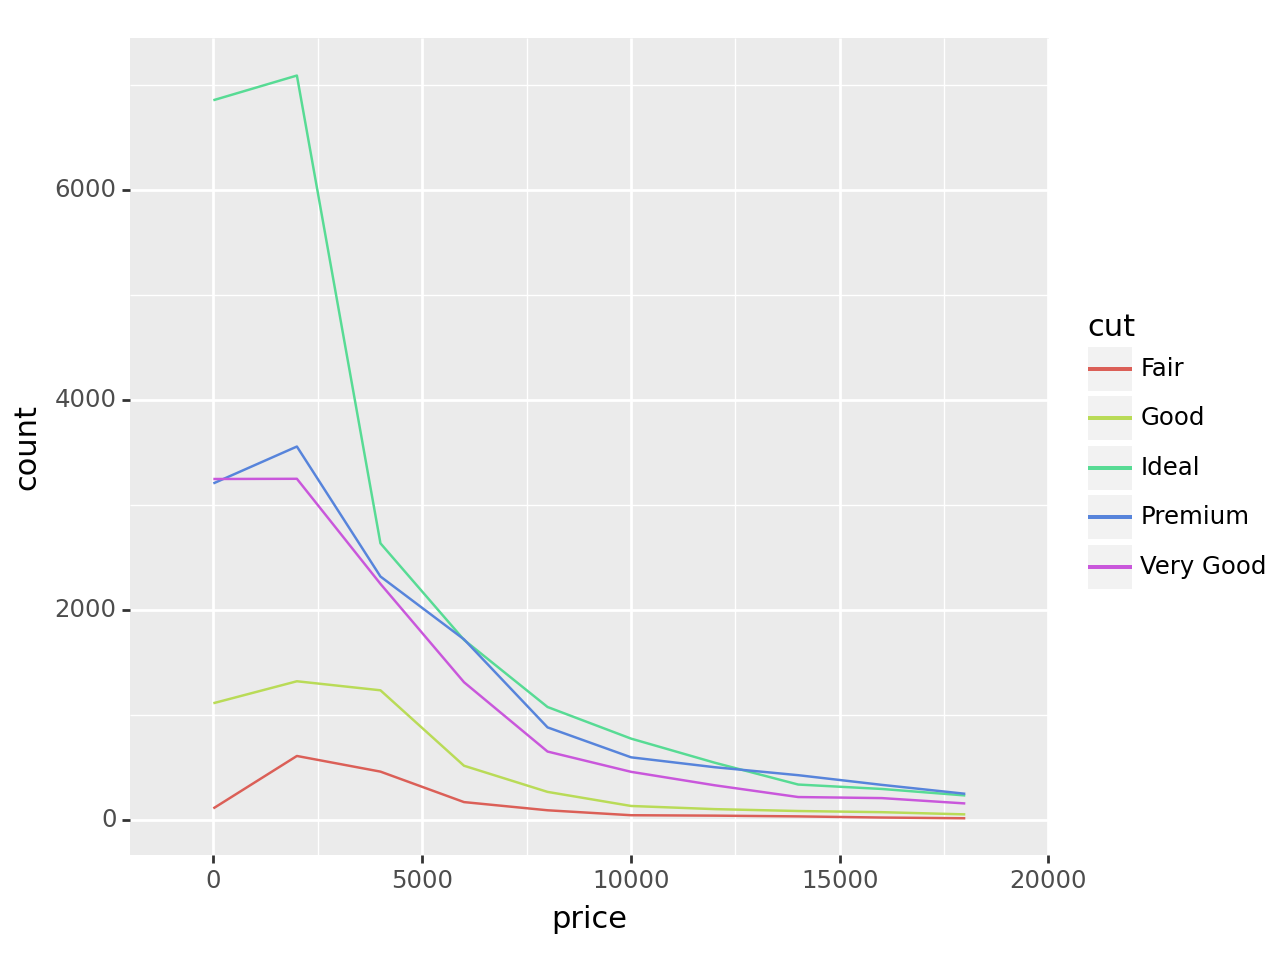

<Figure Size: (640 x 480)>

In [ ]:
pln.ggplot (data = algebra) + pln.geom_freqpoly (mapping = pln.aes(x=algebra['price'], color = algebra['cut']), binwidth=2001)

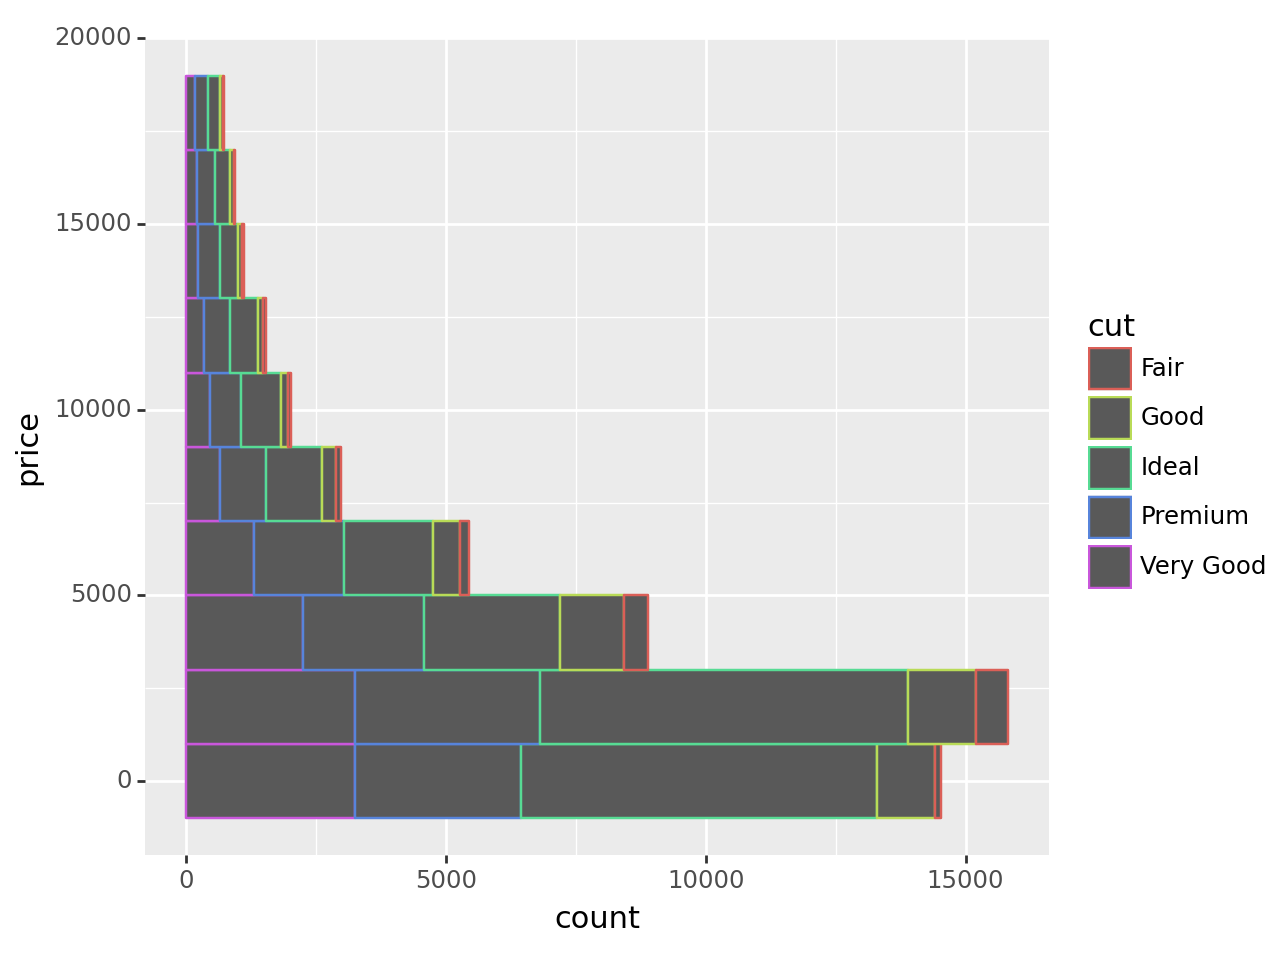

<Figure Size: (640 x 480)>

In [ ]:
pln.ggplot (data = algebra) + pln.geom_histogram (mapping = pln.aes(x=algebra['price'], color = algebra['cut']), binwidth=2000) + pln.coord_flip ()

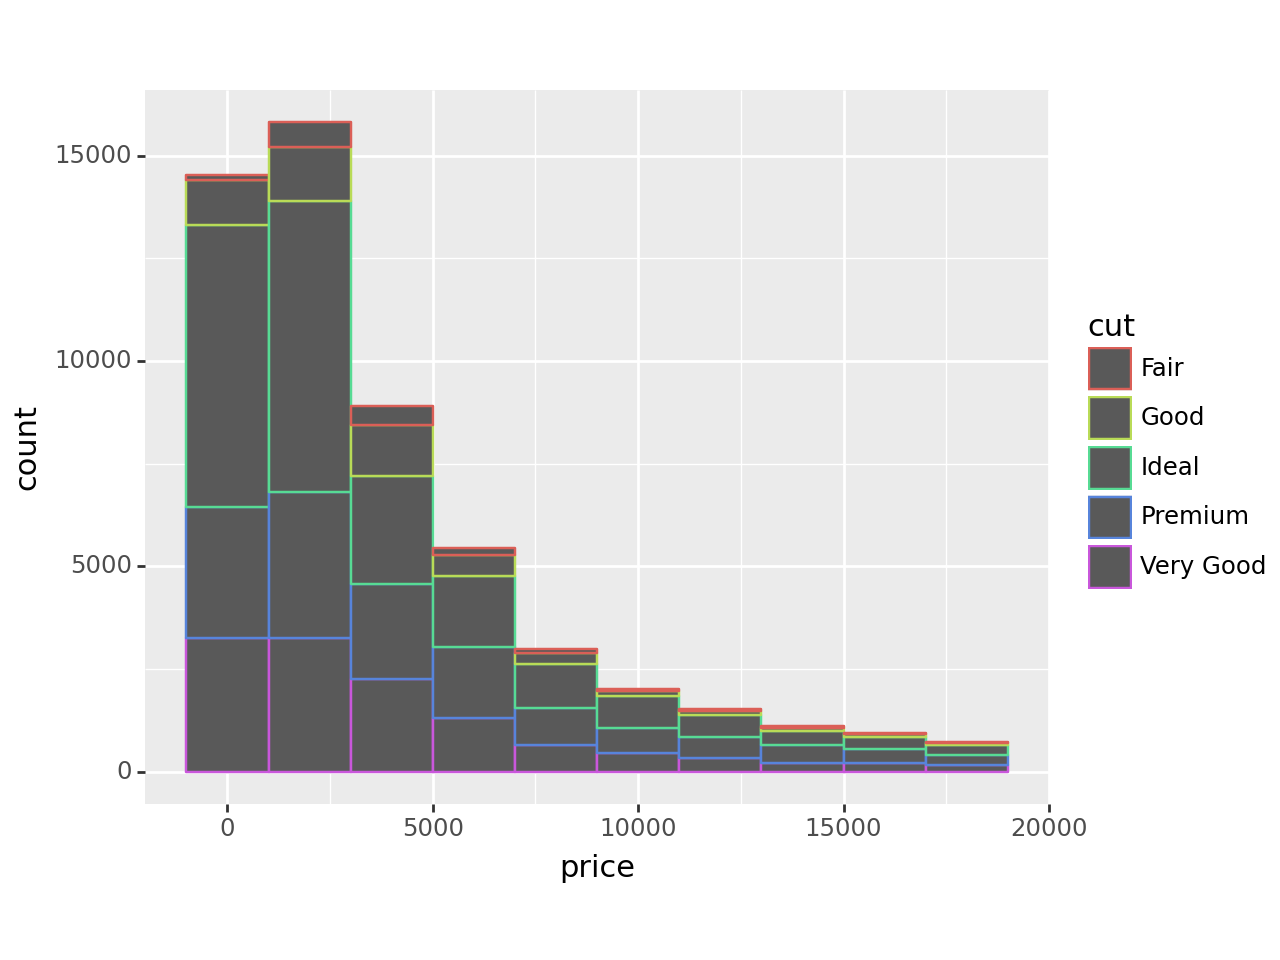

<Figure Size: (640 x 480)>

In [ ]:
pln.ggplot (data = algebra) + pln.geom_histogram (mapping = pln.aes(x=algebra['price'], color = algebra['cut']), binwidth=2000)\
  + pln.coord_equal()   # NOTA: plotnine não suporta coordenadas polares.

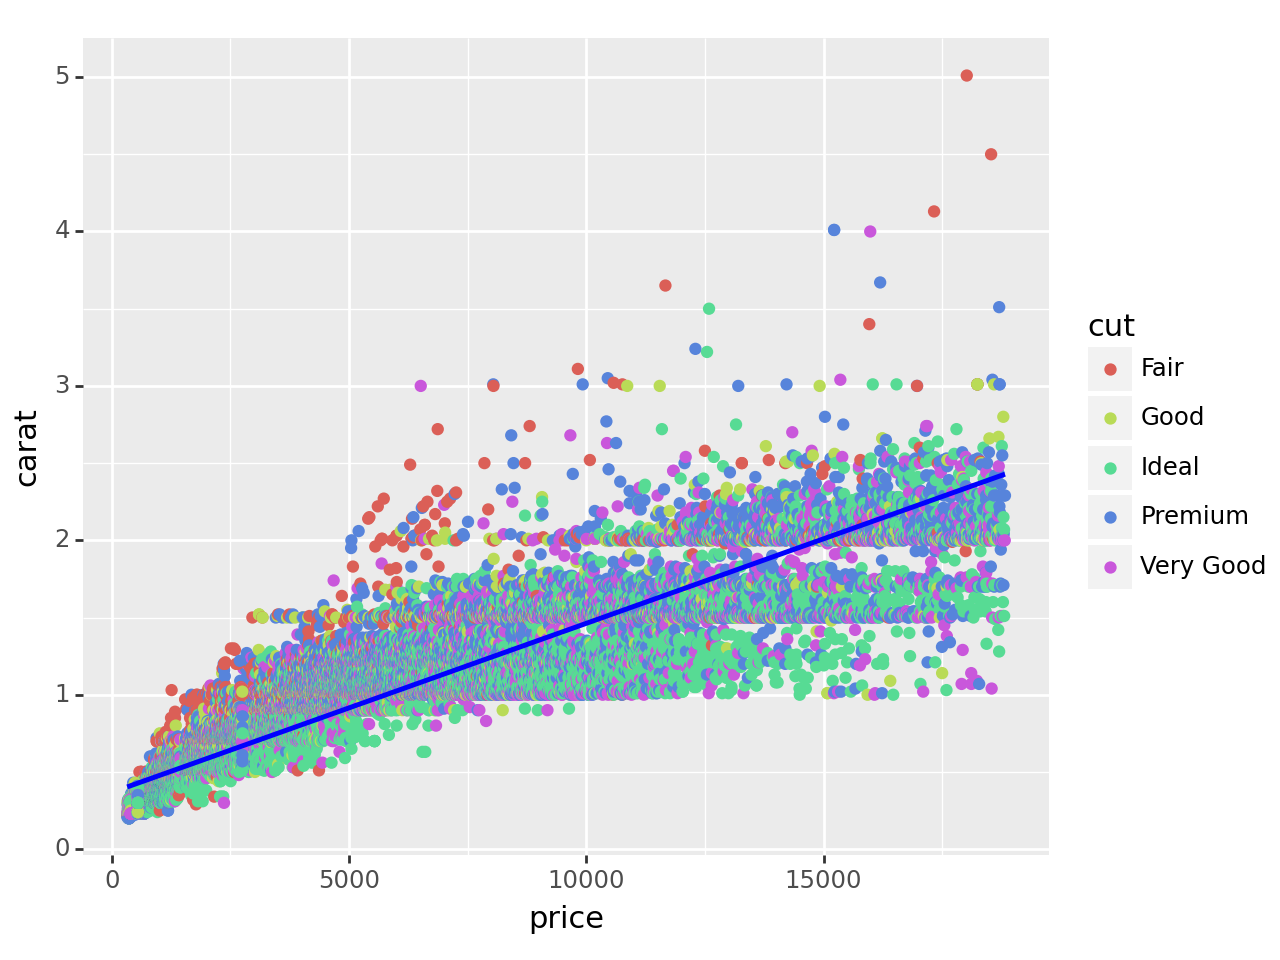

<Figure Size: (640 x 480)>

In [ ]:
(
  pln.ggplot (data = algebra, mapping = pln.aes(x=algebra['price'],y=algebra['carat'], color = algebra['cut'])) +
  pln.geom_point (mapping = pln.aes()) +
  pln.geom_smooth(method = "lm", se = False, color = 'blue')
)

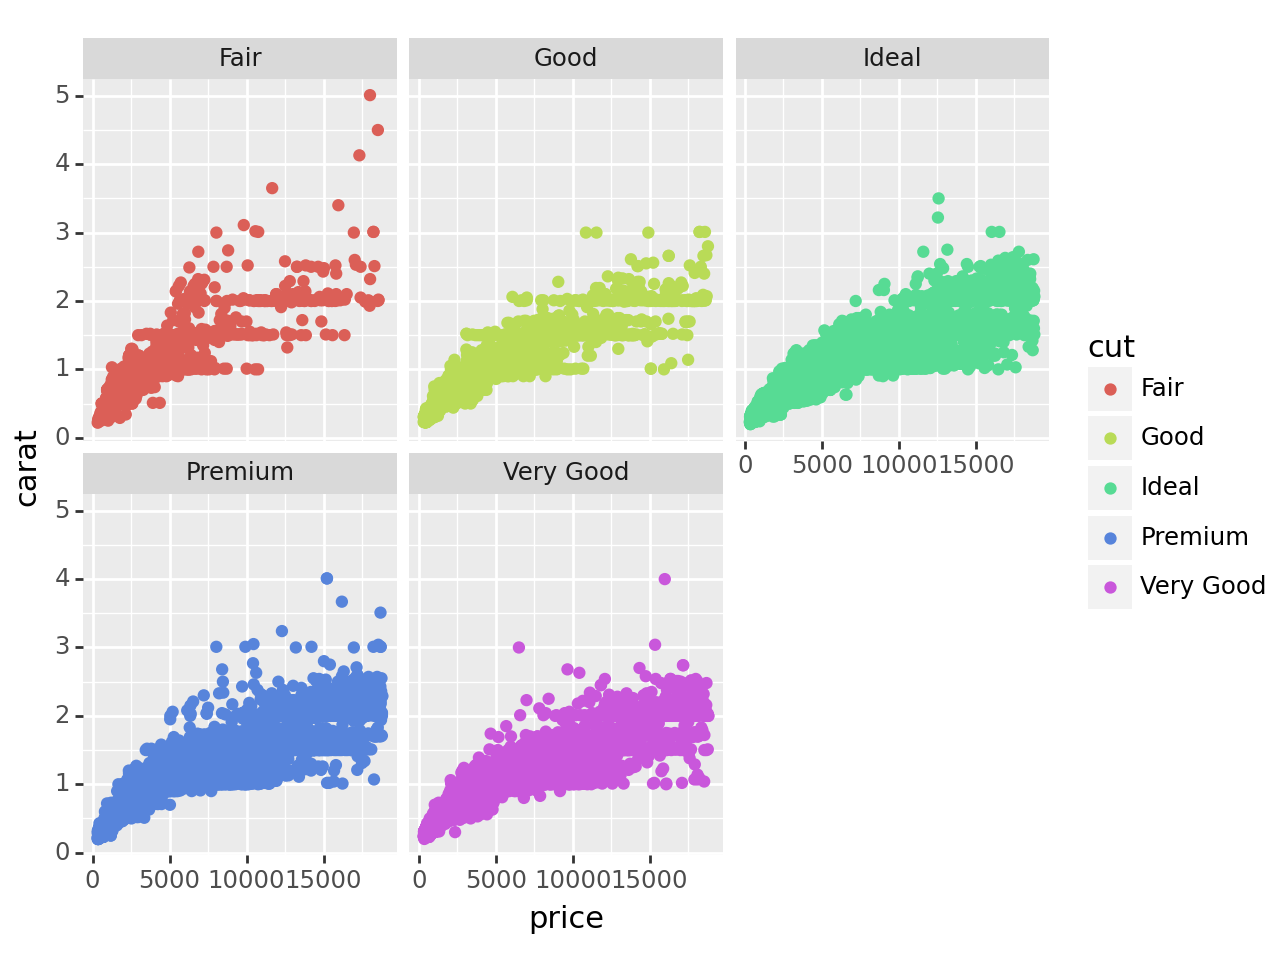

<Figure Size: (640 x 480)>

In [ ]:
(
  pln.ggplot (data = algebra, mapping = pln.aes(x=algebra['price'],y=algebra['carat'], color = algebra['cut'])) +
  pln.geom_point () +
  pln.facet_wrap ('~cut', nrow=2)
)

### Caso 1 da Seção 10.1 na referência [34].

In [ ]:
import pyreadr

pyreadr.download_file('https://github.com/rafalab/dslabs/raw/master/data/gapminder.rda', "gapminder.rda")
result = pyreadr.read_r('gapminder.rda')

print(result.keys())
gapminder = result["gapminder"]
gapminder['country'] = gapminder['country'].astype('object')
gapminder

odict_keys(['gapminder', 'oecd', 'opec'])


,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
0,Albania,1960,115.40,62.87,6.19,1636054.0,NaN,Europe,Southern Europe
1,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa
2,Angola,1960,208.00,35.98,7.32,5270844.0,NaN,Africa,Middle Africa
3,Antigua and Barbuda,1960,NaN,62.97,4.43,54681.0,NaN,Americas,Caribbean
4,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America
...,...,...,...,...,...,...,...,...,...
10540,West Bank and Gaza,2016,NaN,74.70,NaN,NaN,NaN,Asia,Western Asia
10541,Vietnam,2016,NaN,75.60,NaN,NaN,NaN,Asia,South-Eastern Asia
10542,Yemen,2016,NaN,64.92,NaN,NaN,NaN,Asia,Western Asia
10543,Zambia,2016,NaN,57.10,NaN,NaN,NaN,Africa,Eastern Africa


In [ ]:
gapminder_filtered = gapminder[(gapminder['year'] == 2015) & ((gapminder['country'] == 'Sri Lanka') | (gapminder['country'] == 'Turkey'))]
print('country infant_mortality:')
gapminder_filtered[["country", "infant_mortality"]]

country infant_mortality:


,country,infant_mortality
10329,Sri Lanka,8.4
10344,Turkey,11.6


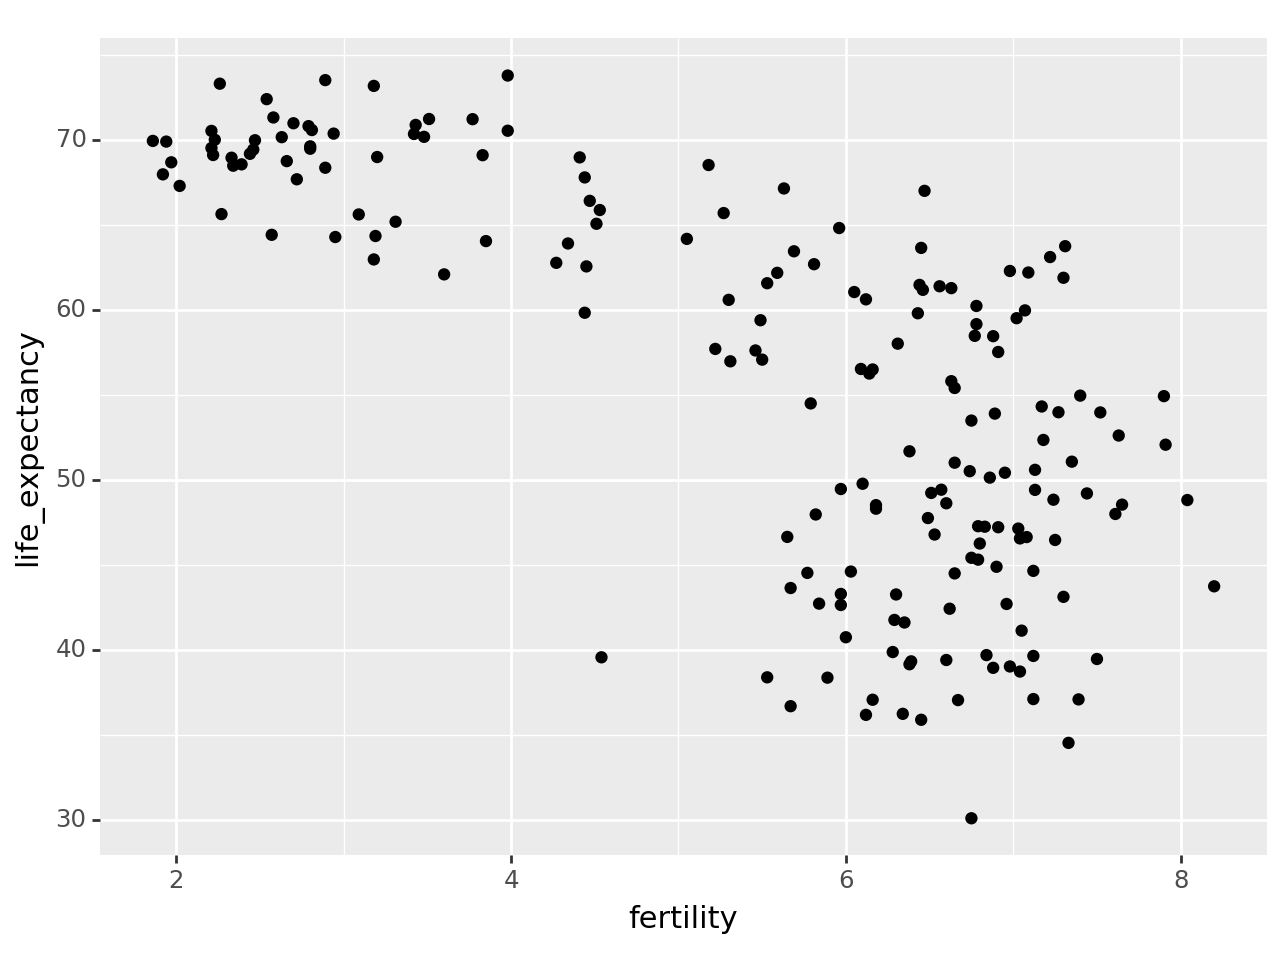

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(gapminder[(gapminder['year'] == 1962)])
    + pln.aes(x="fertility", y="life_expectancy")
    + pln.geom_point()
)

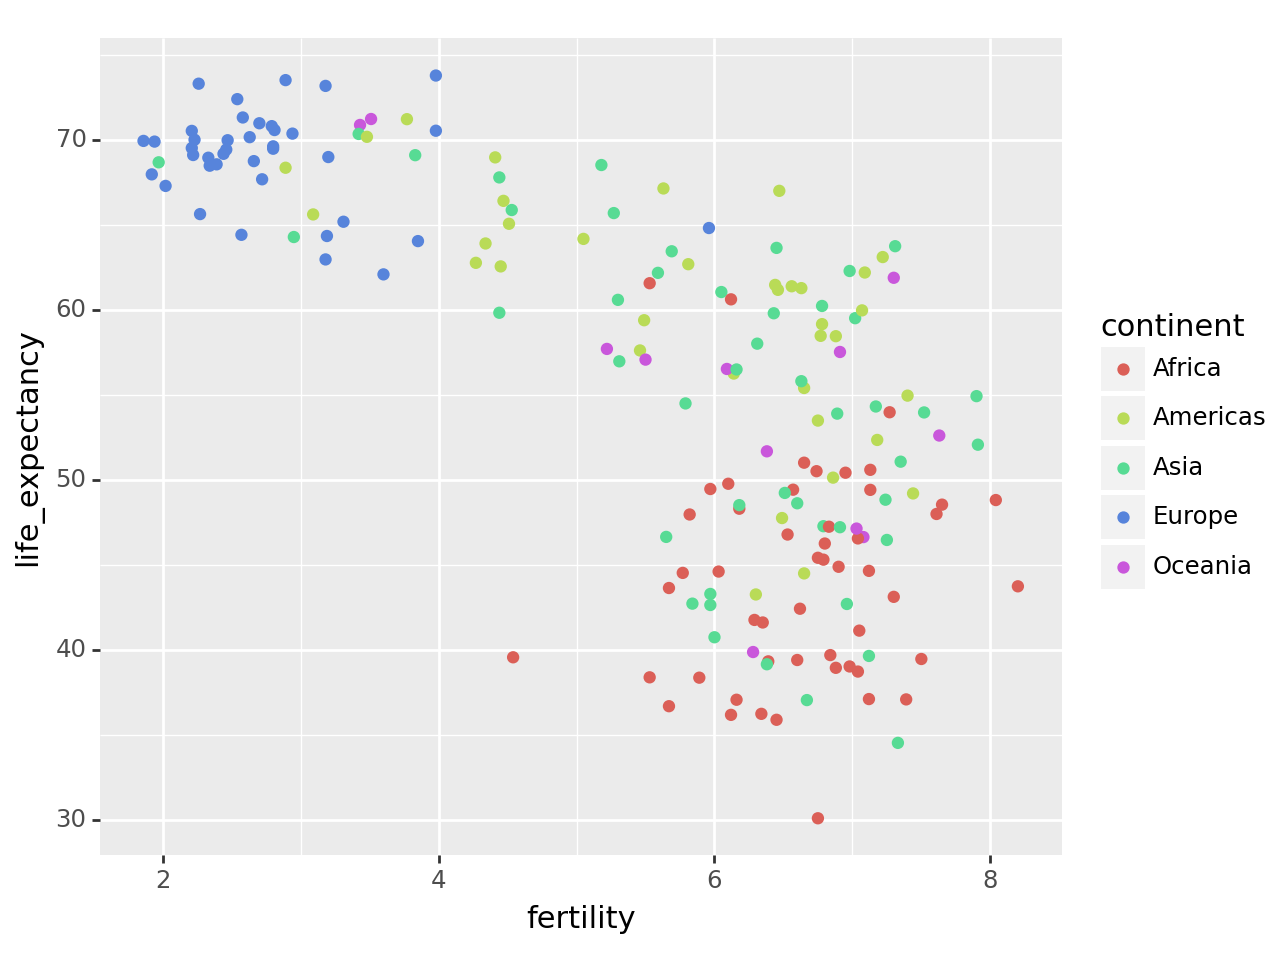

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(gapminder[(gapminder['year'] == 1962)])
    + pln.aes(x="fertility", y="life_expectancy", color='continent')
    + pln.geom_point()
)

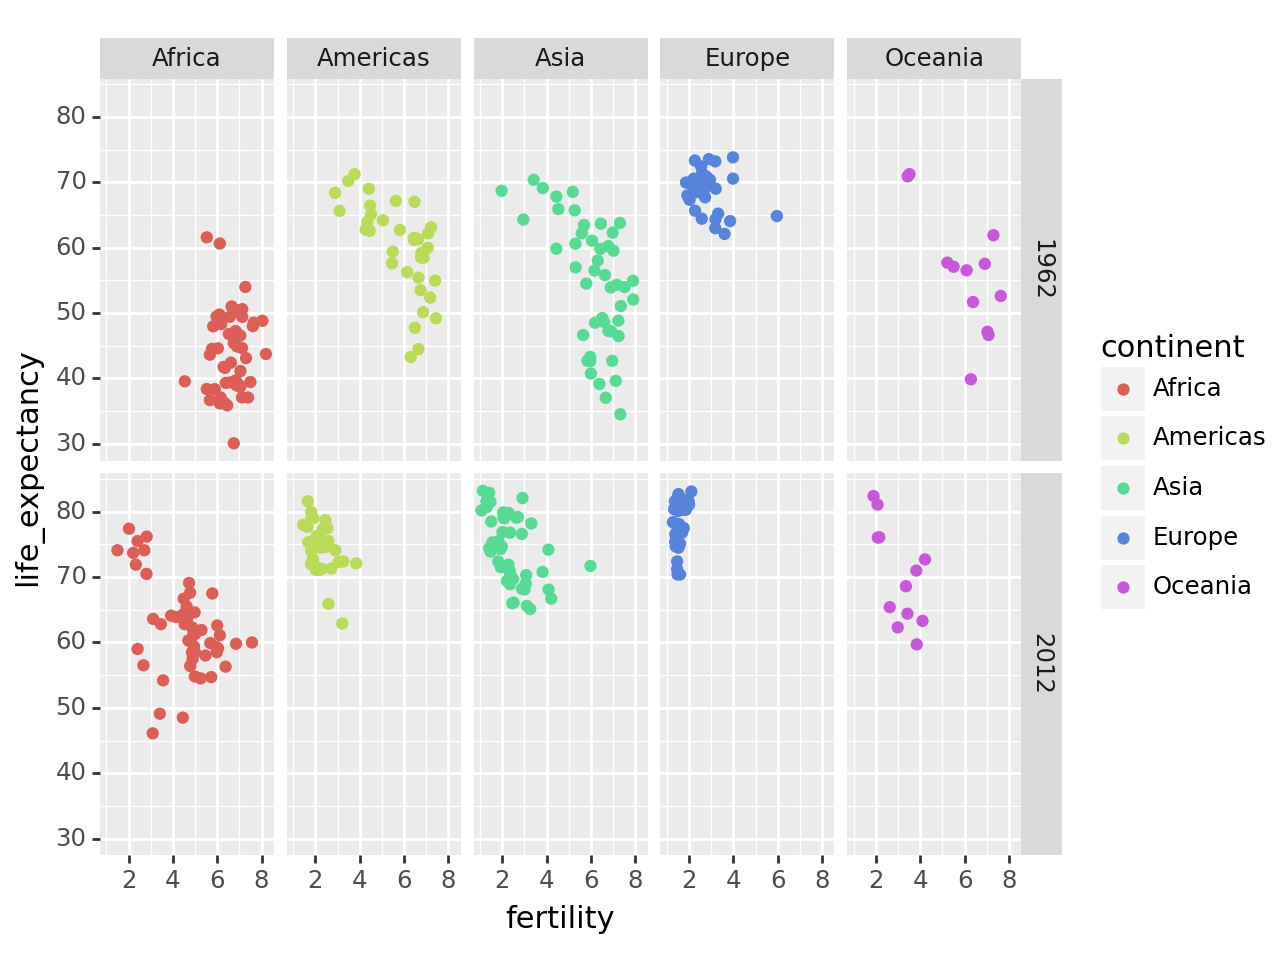

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(gapminder[(gapminder['year'] == 1962) | (gapminder['year'] == 2012)])
    + pln.aes(x="fertility", y="life_expectancy", color="continent")
    + pln.geom_point()
    + pln.facet_grid('year~continent')
)

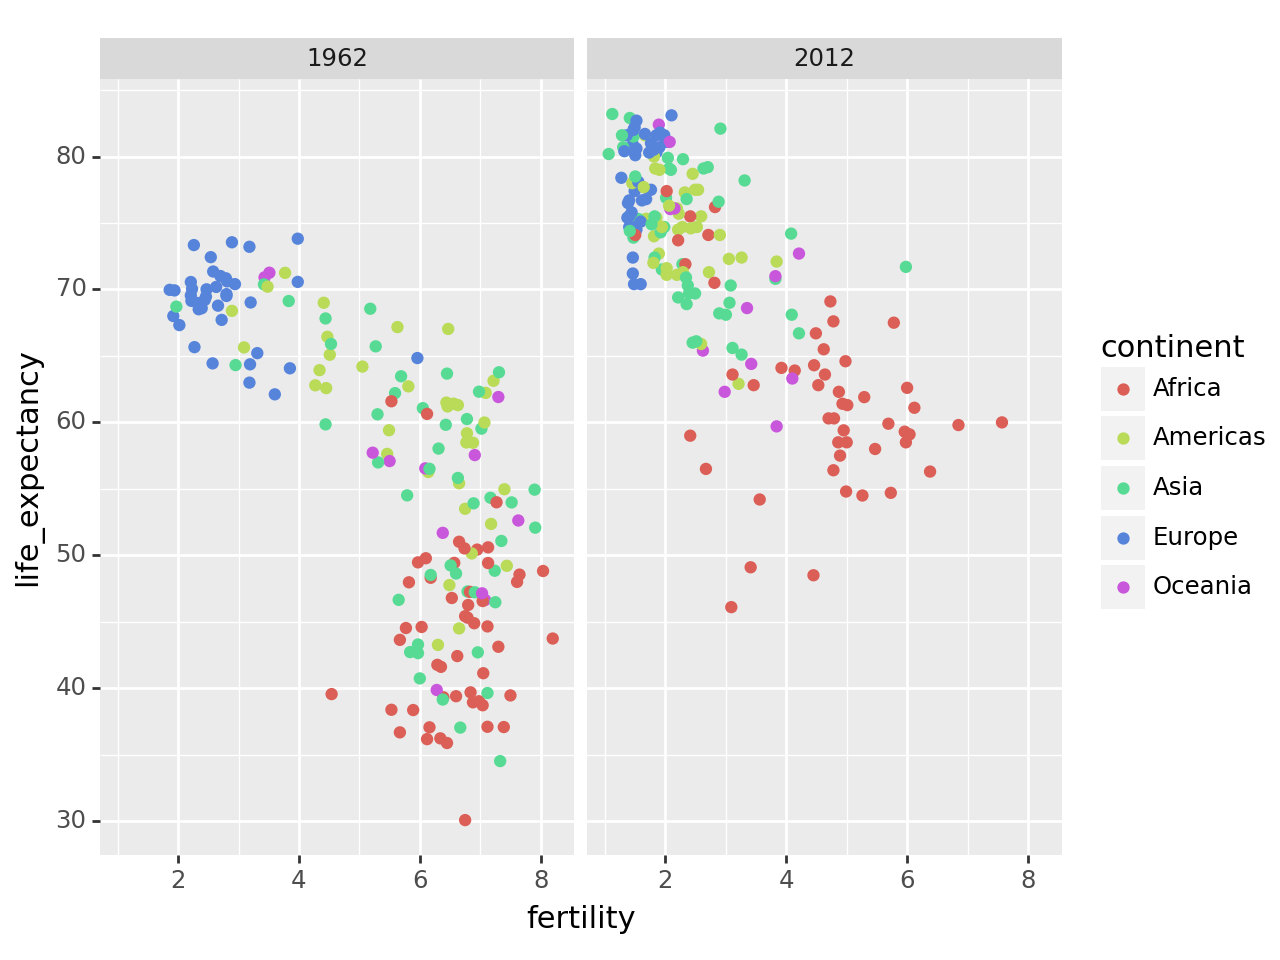

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(gapminder[(gapminder['year'] == 1962) | (gapminder['year'] == 2012)])
    + pln.aes(x="fertility", y="life_expectancy", color="continent")
    + pln.geom_point()
    + pln.facet_grid('.~year')
)

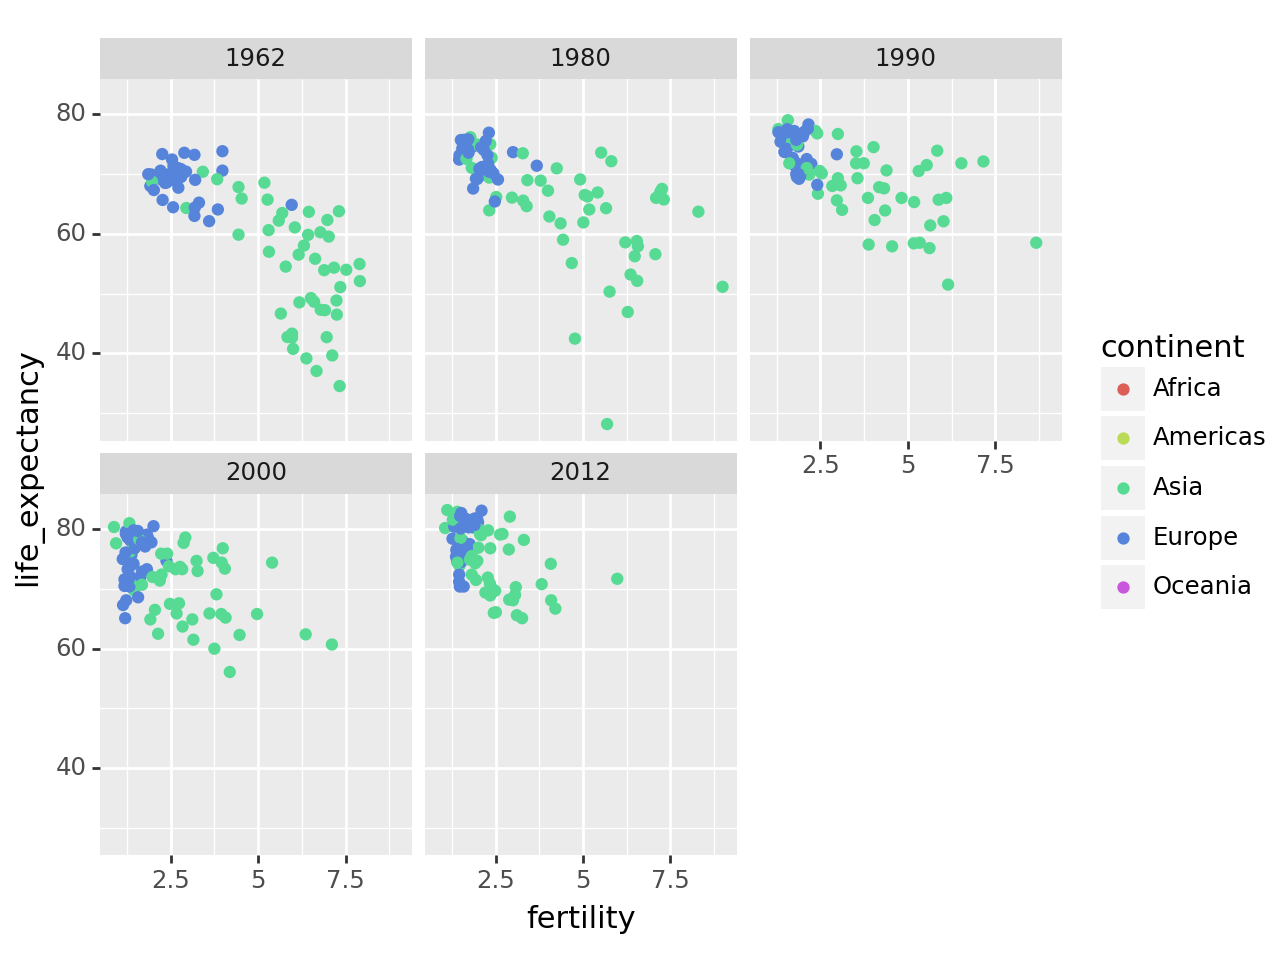

<Figure Size: (640 x 480)>

In [ ]:
years = [1962, 1980, 1990, 2000, 2012]
continents = ["Europe", "Asia"]
(
    pln.ggplot(gapminder[(gapminder['year'].isin(years)) & (gapminder['continent'].isin(continents))])
    + pln.aes(x="fertility", y="life_expectancy", color="continent")
    + pln.geom_point()
    + pln.facet_wrap('~ year')
)

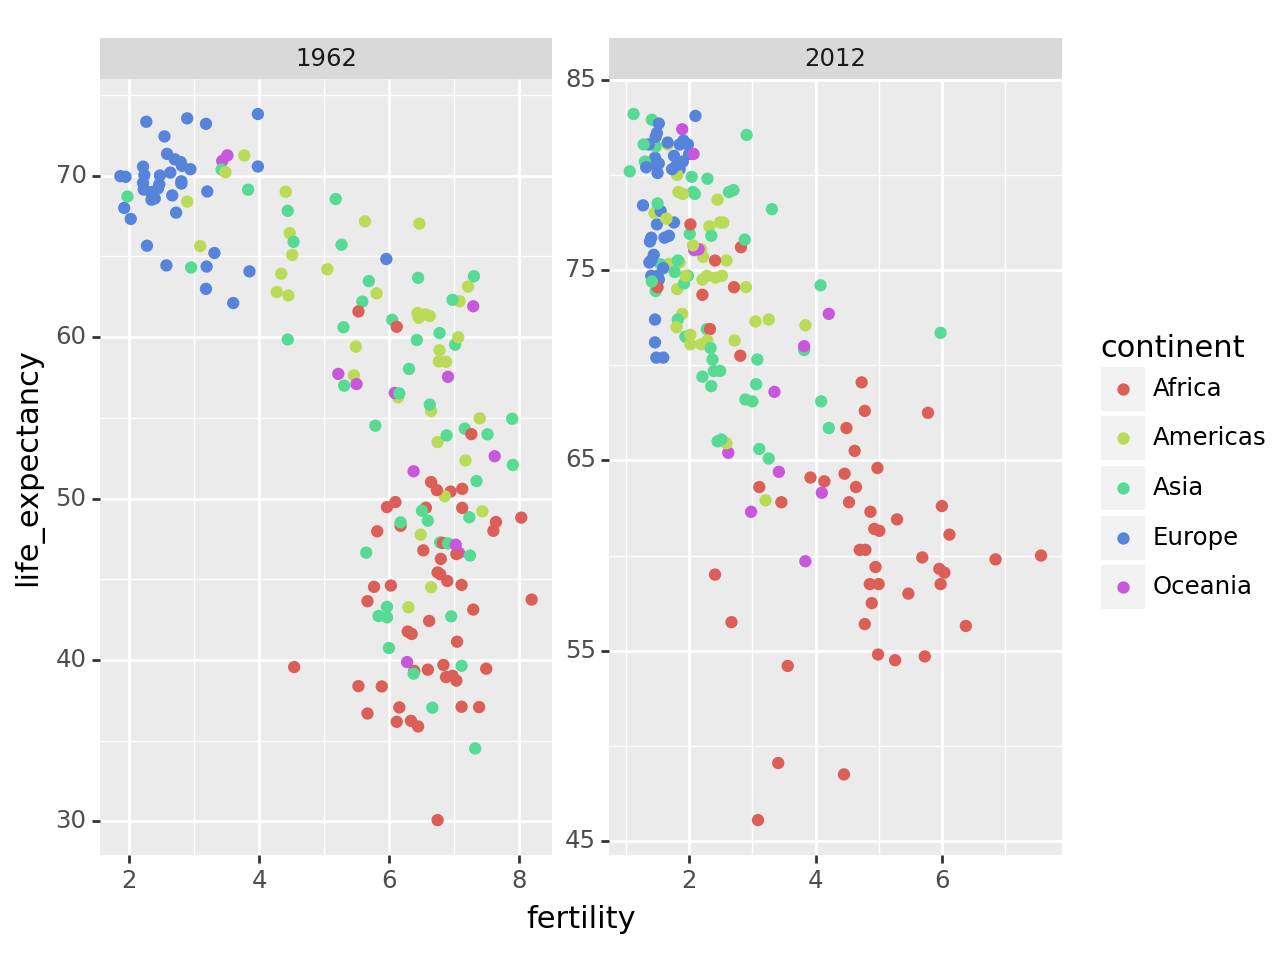

<Figure Size: (640 x 480)>

In [ ]:

years = [1962, 2012]
(
    pln.ggplot(gapminder[(gapminder['year'].isin(years))])
    + pln.aes(x="fertility", y="life_expectancy", color="continent")
    + pln.geom_point()
    + pln.facet_wrap('~ year', scales="free")
)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


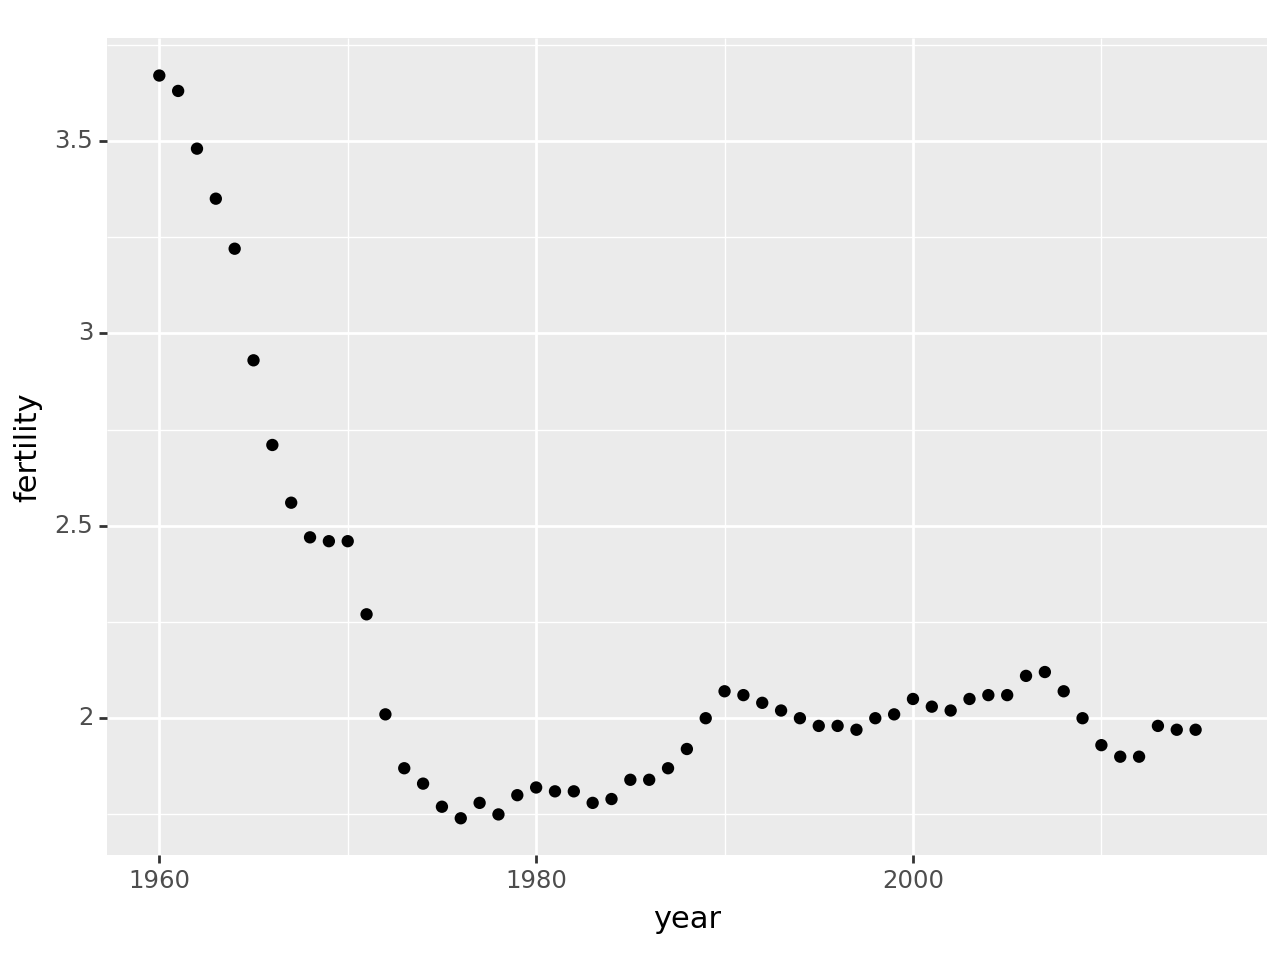

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(gapminder[gapminder['country'] == "United States"])
    + pln.aes(x="year", y="fertility")
    + pln.geom_point()
)

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


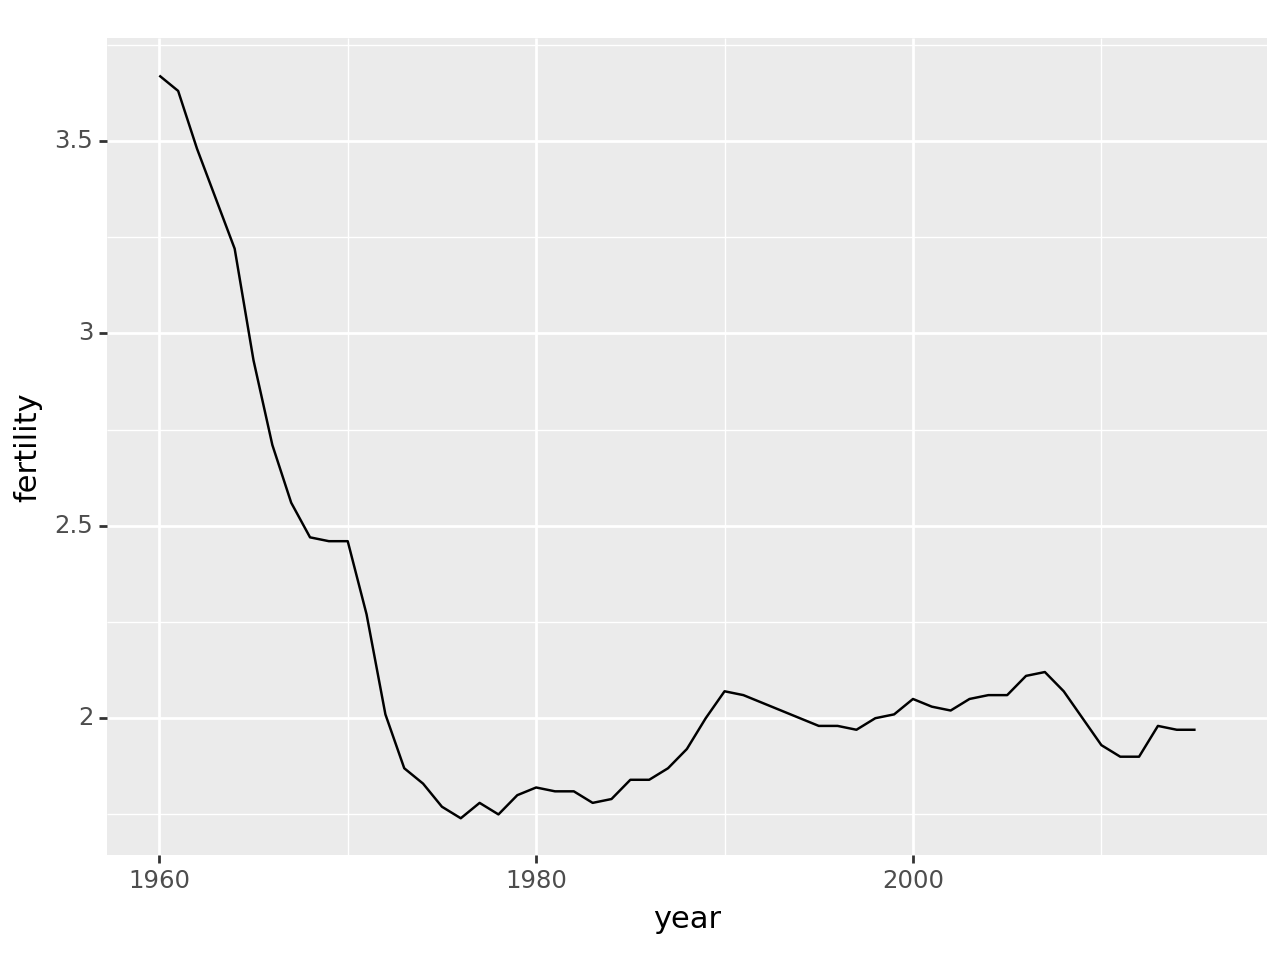

<Figure Size: (640 x 480)>

In [ ]:

(
    pln.ggplot(gapminder[gapminder['country'] == "United States"])
    + pln.aes(x="year", y="fertility")
    + pln.geom_line()
)

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


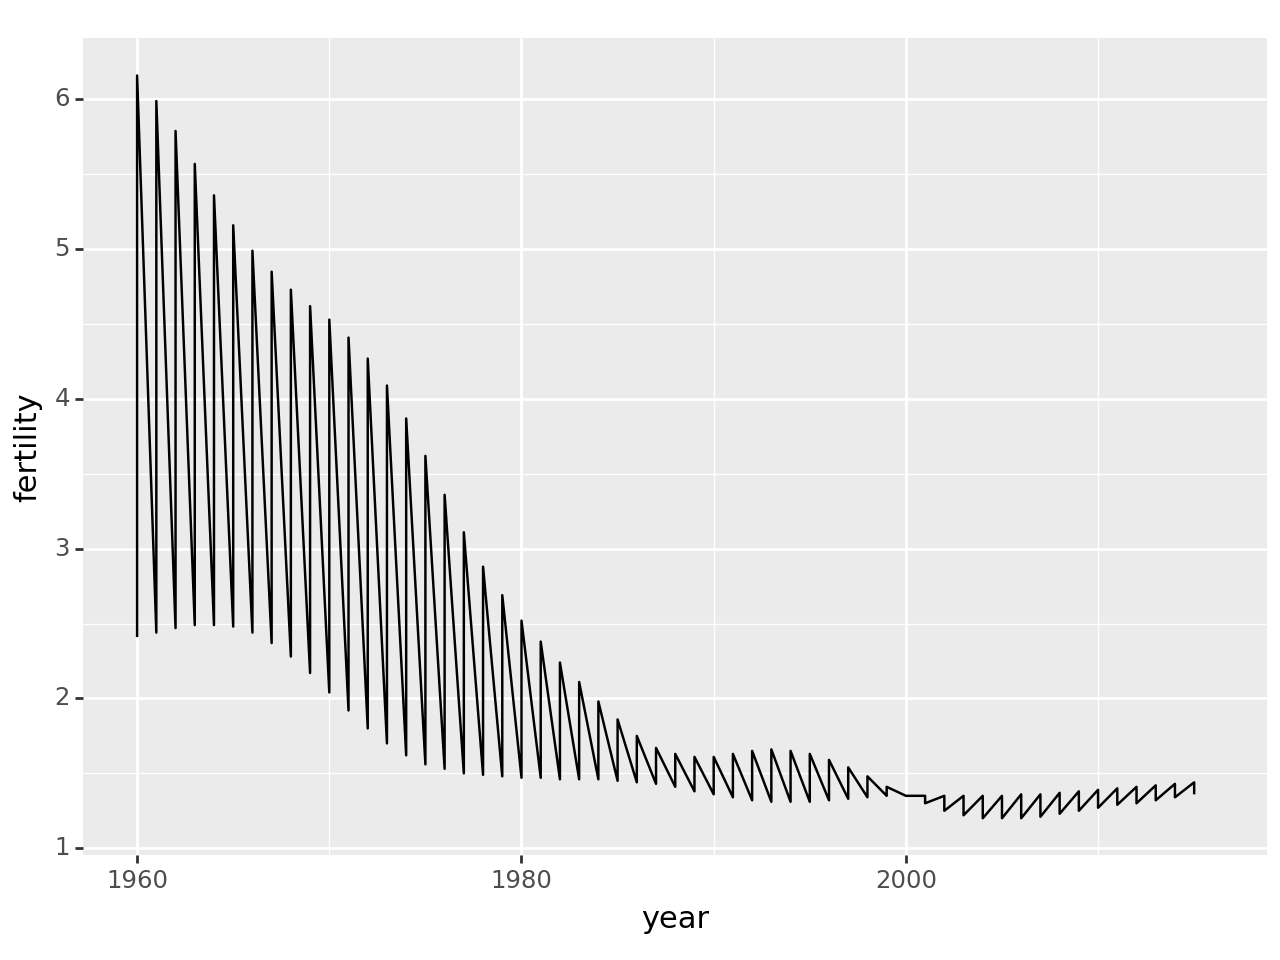

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(gapminder[gapminder['country'].isin(["South Korea", "Germany"])])
    + pln.aes(x="year", y="fertility")
    + pln.geom_line()
)

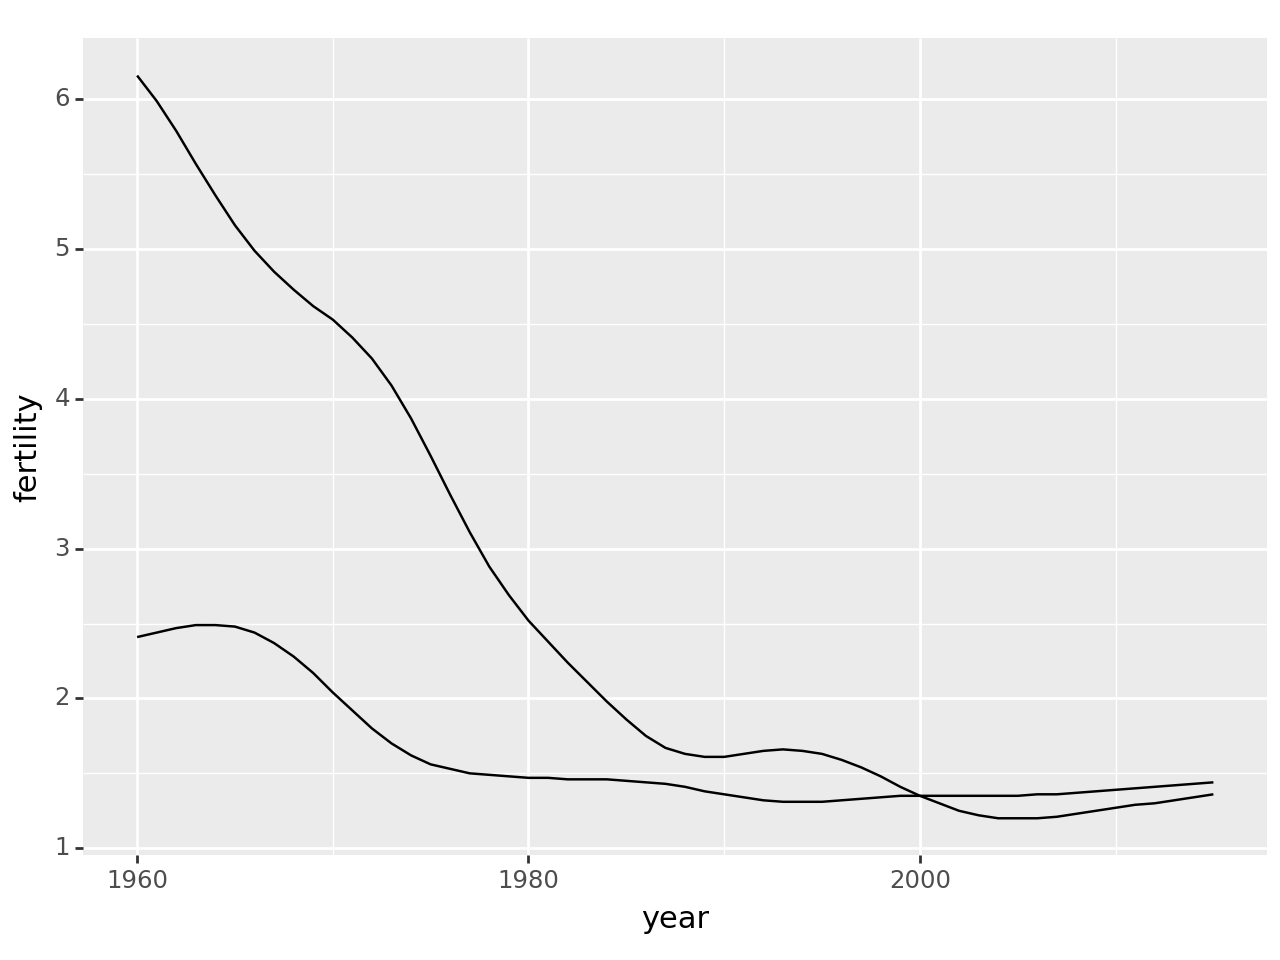

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(gapminder[gapminder['country'].isin(["South Korea", "Germany"]) & ~gapminder['fertility'].isna()])
    + pln.aes(x="year", y="fertility", group='country')
    + pln.geom_line()
)

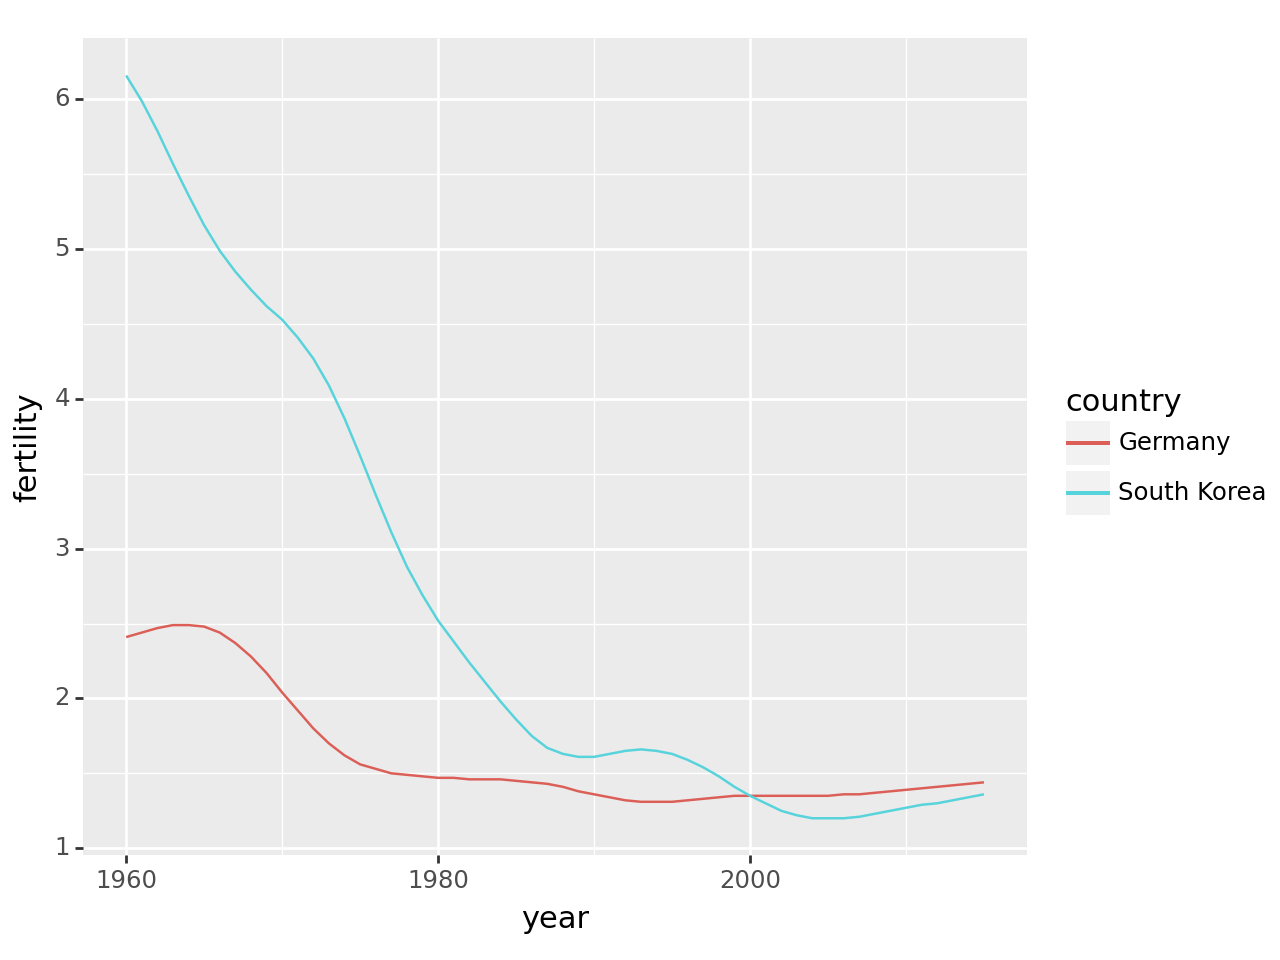

<Figure Size: (640 x 480)>

In [ ]:
countries = ["South Korea", "Germany"]
(
    pln.ggplot(gapminder[(gapminder['country'].isin(countries)) & (gapminder['fertility'].notnull())])
    + pln.aes(x="year", y="fertility", color='country')
    + pln.geom_line()
)

### Caso 2 descrito na Seção 10.5 na referência [34].

In [ ]:
gapminder['dollars_per_day'] = gapminder['gdp']/gapminder['population']/365

gapminder['dollars_per_day']

0              NaN
1         3.405458
2              NaN
3              NaN
4        14.393153
           ...    
10540          NaN
10541          NaN
10542          NaN
10543          NaN
10544          NaN
Name: dollars_per_day, Length: 10545, dtype: float64

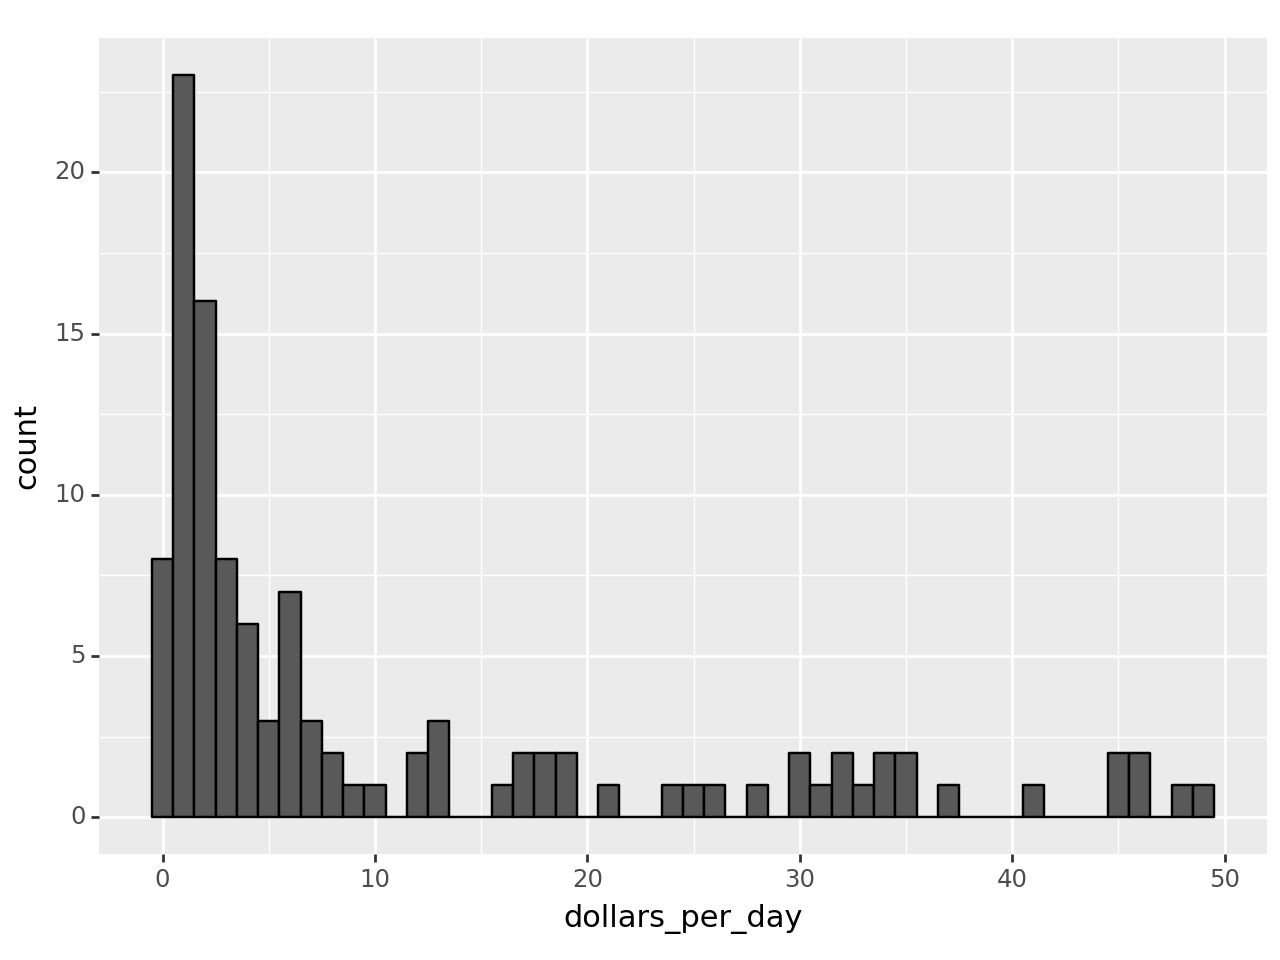

<Figure Size: (640 x 480)>

In [ ]:
past_year = 1970

(
    pln.ggplot(gapminder[(gapminder['year'] == past_year) & (gapminder['gdp'].notnull())],
               pln.aes('dollars_per_day'))
    + pln.geom_histogram(binwidth=1, color='black')
)


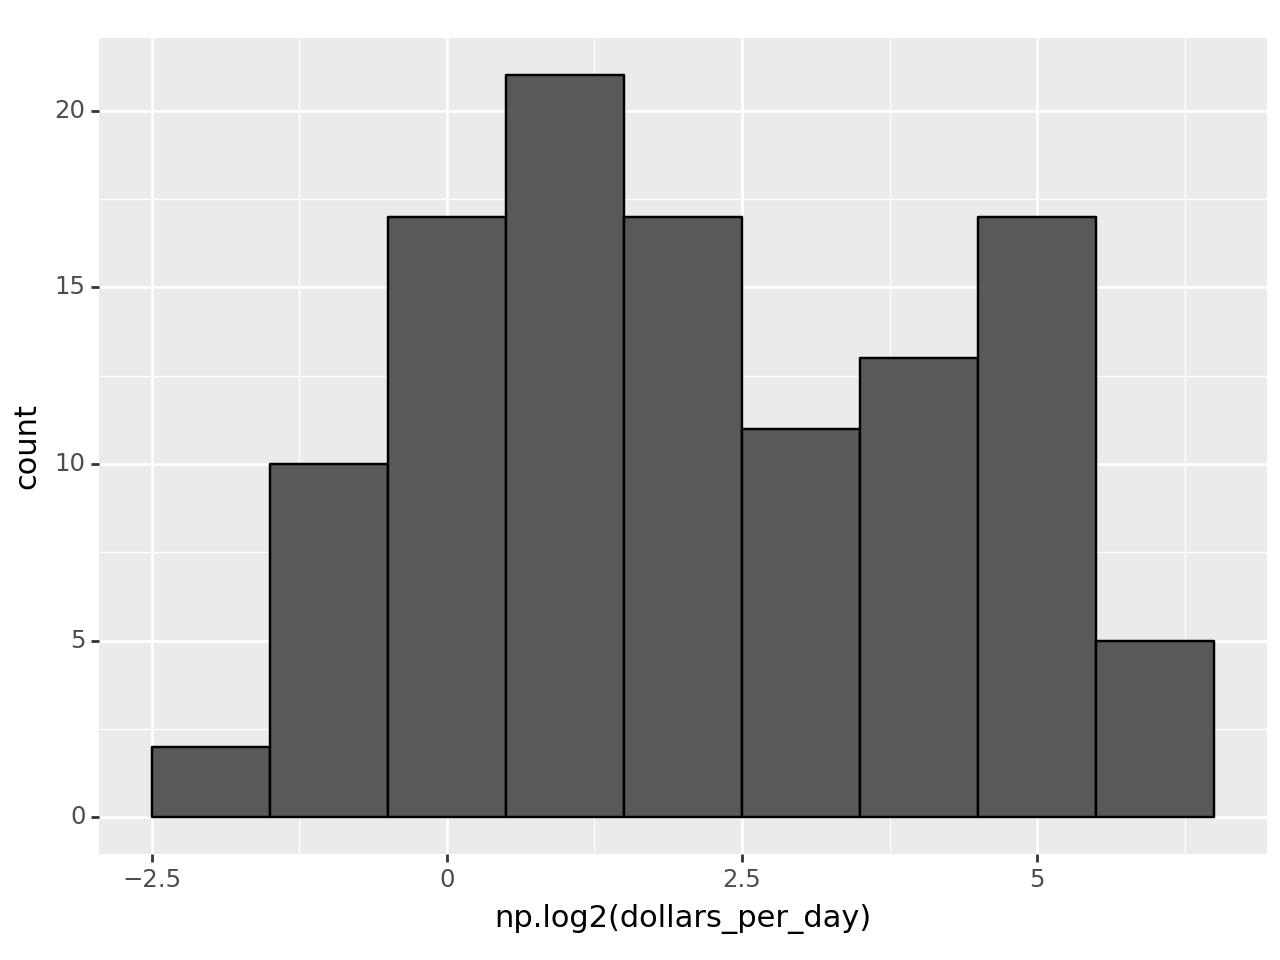

<Figure Size: (640 x 480)>

In [ ]:
past_year = 1970
filtered = gapminder[(gapminder['year'] == past_year) & (gapminder['gdp'].notnull())]

(
    pln.ggplot(filtered,
               pln.aes('np.log2(dollars_per_day)'))
    + pln.geom_histogram(binwidth=1, color='black')
)

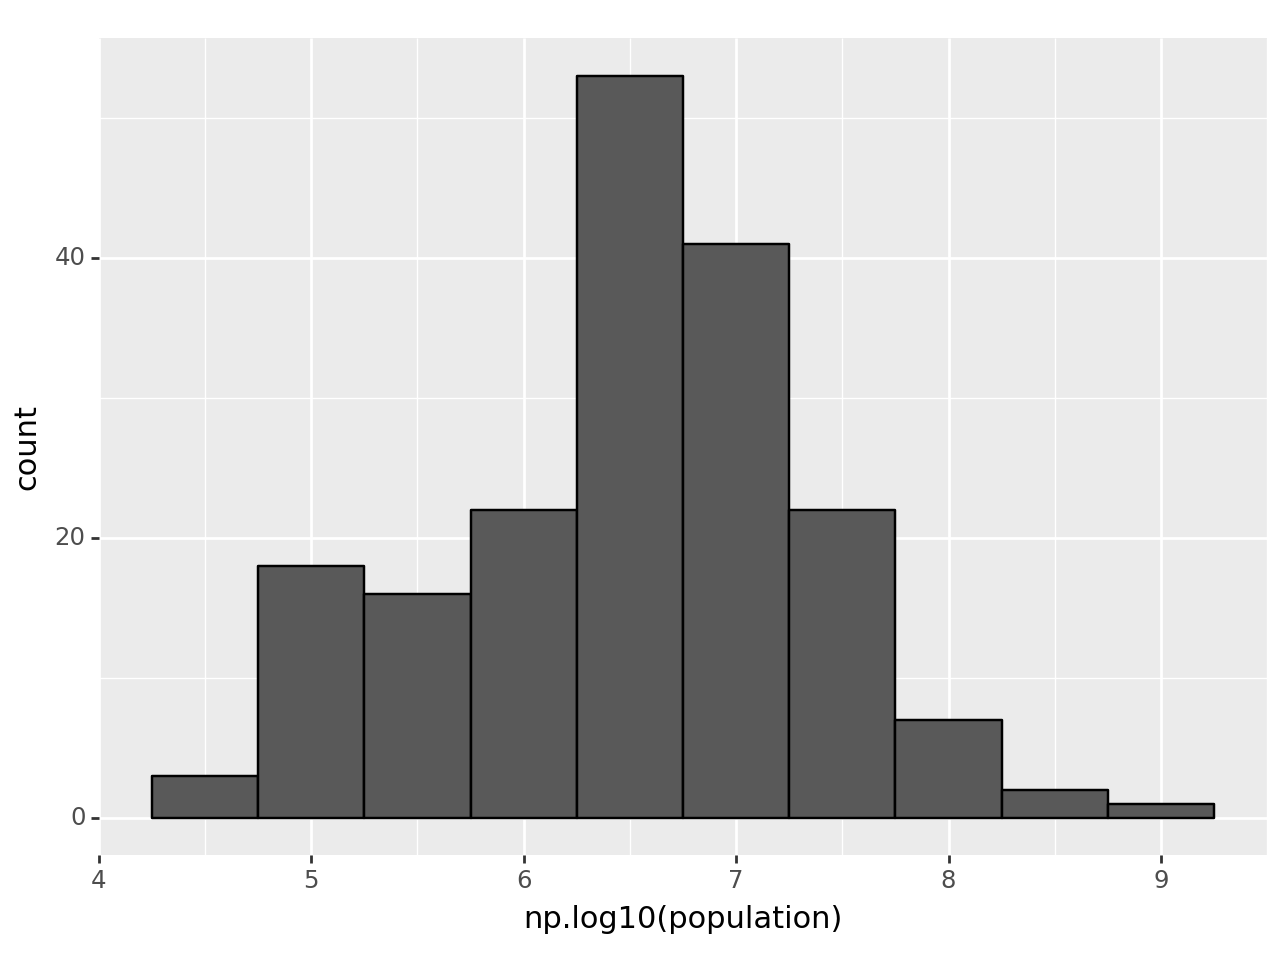

<Figure Size: (640 x 480)>

In [ ]:
past_year = 1970
filtered = gapminder[(gapminder['year'] == past_year)]

(
    pln.ggplot(filtered,
               pln.aes('np.log10(population)'))
    + pln.geom_histogram(binwidth=0.5, color='black')
)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 72 rows containing non-finite values.


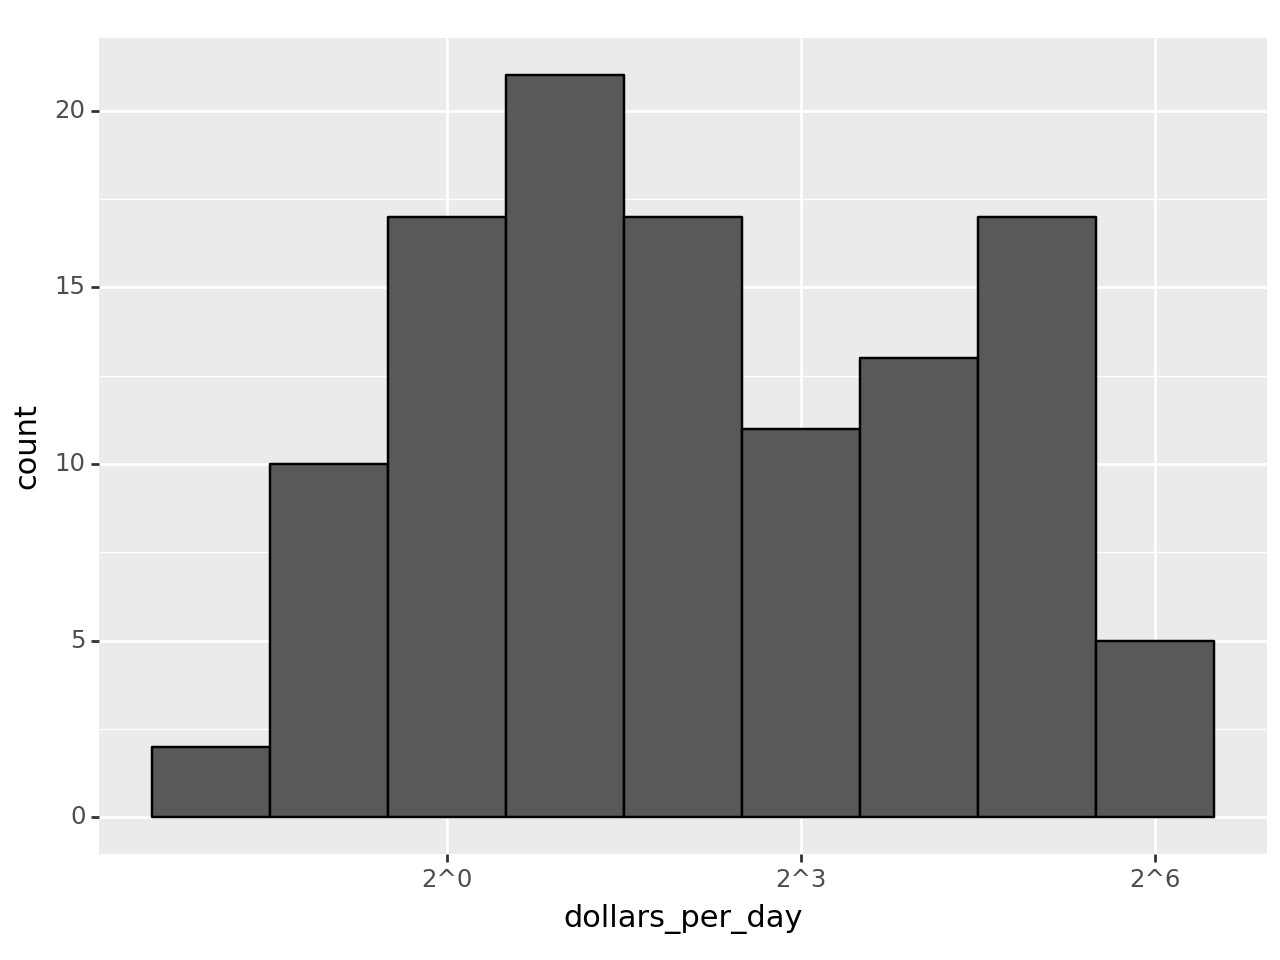

<Figure Size: (640 x 480)>

In [ ]:
past_year = 1970
filtered = gapminder[(gapminder['year'] == past_year)]

(
    pln.ggplot(filtered,
               pln.aes('dollars_per_day'))
    + pln.geom_histogram(binwidth=1, color='black')
    + pln.scale_x_continuous(trans='log2')
)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 72 rows containing missing values.


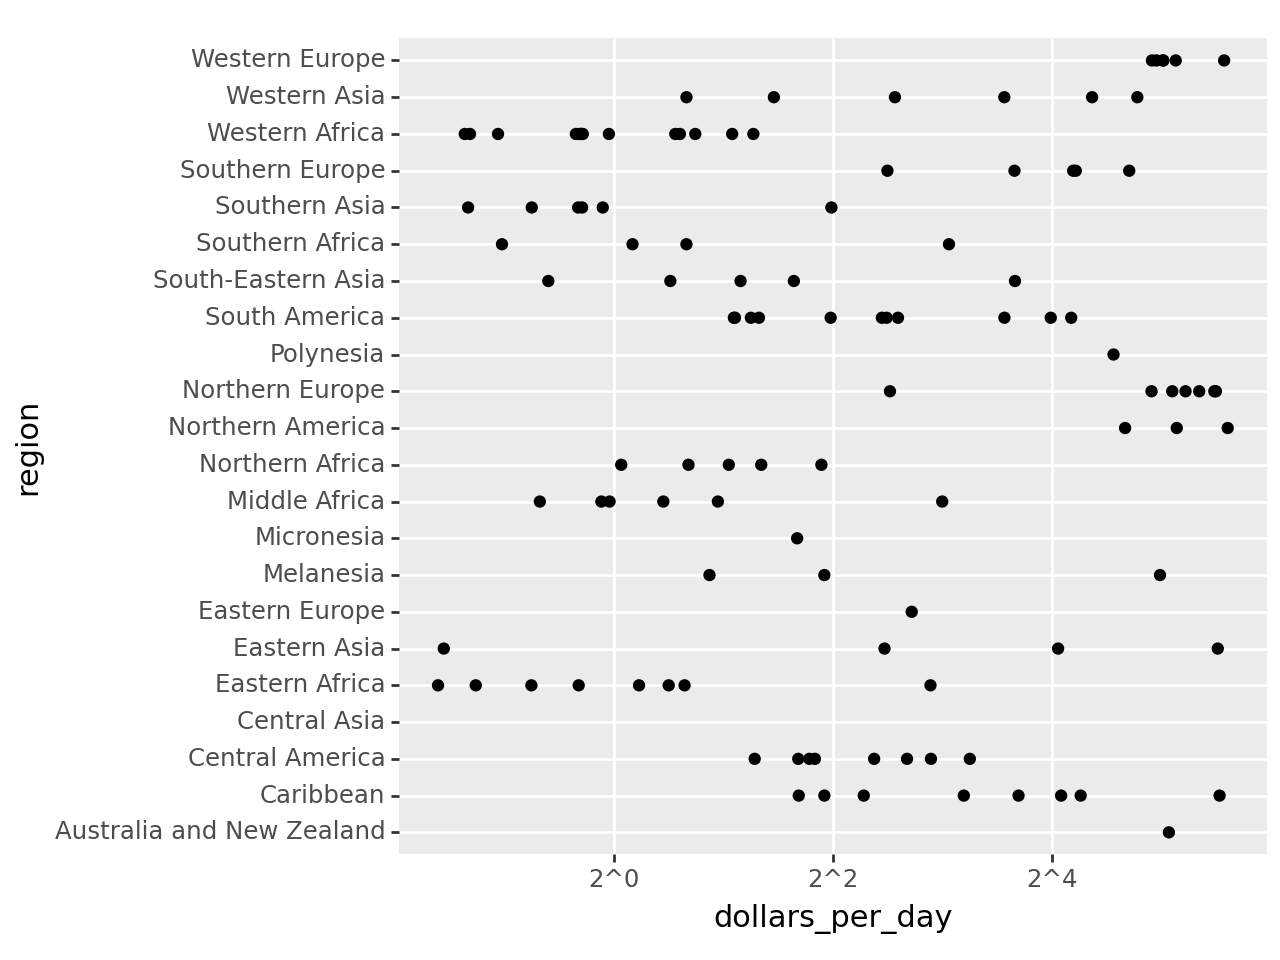

<Figure Size: (640 x 480)>

In [ ]:
past_year = 1970

sorted_regions = gapminder.groupby('region')['dollars_per_day'].median().sort_values()

sorted_gapminder = gapminder.set_index('region')
sorted_gapminder = sorted_gapminder.loc[sorted_regions.index].reset_index()

filtered = sorted_gapminder[(sorted_gapminder['year'] == past_year)]

# Aparentemente o plotnine não mantem a ordem do DataFrame, então parece não ser
# possível replicar o código em R
(
    pln.ggplot(filtered,
               pln.aes('dollars_per_day', 'region'))
    + pln.geom_point()
    + pln.scale_x_continuous(trans='log2')
)

In [ ]:
past_year = 1970

# função que calcula o group com base na linha
def set_group(row):
  region = row['region']
  continent = row['continent']

  if region in ["Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand"]:
    return "West"
  elif region in ["Eastern Asia", "South-Eastern Asia"]:
    return "East Asia"
  elif region in ["Caribbean", "Central America",  "South America"]:
    return "Latin America"
  elif continent == "Africa" and region != "Northern Africa":
    return "Sub-Saharan"
  else:
    return "Others"

grouped_gapminder = gapminder.copy()
# Cria coluna group incializando cada elemento com a função 'set_group'
grouped_gapminder['group'] = grouped_gapminder.apply(set_group, axis=1)

# Define uma ordem para os elementos de 'group', ou seja, tornando essa coluna
# uma coluna de tipo 'category'
categories = ['Others', 'Latin America', 'East Asia', 'Sub-Saharan', 'West']
grouped_gapminder['group'] = pd.Categorical(grouped_gapminder['group'], categories=categories)

grouped_gapminder



,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,dollars_per_day,group
0,Albania,1960,115.40,62.87,6.19,1636054.0,NaN,Europe,Southern Europe,NaN,West
1,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa,3.405458,Others
2,Angola,1960,208.00,35.98,7.32,5270844.0,NaN,Africa,Middle Africa,NaN,Sub-Saharan
3,Antigua and Barbuda,1960,NaN,62.97,4.43,54681.0,NaN,Americas,Caribbean,NaN,Latin America
4,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America,14.393153,Latin America
...,...,...,...,...,...,...,...,...,...,...,...
10540,West Bank and Gaza,2016,NaN,74.70,NaN,NaN,NaN,Asia,Western Asia,NaN,Others
10541,Vietnam,2016,NaN,75.60,NaN,NaN,NaN,Asia,South-Eastern Asia,NaN,East Asia
10542,Yemen,2016,NaN,64.92,NaN,NaN,NaN,Asia,Western Asia,NaN,Others
10543,Zambia,2016,NaN,57.10,NaN,NaN,NaN,Africa,Eastern Africa,NaN,Sub-Saharan


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 72 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 72 rows containing missing values.


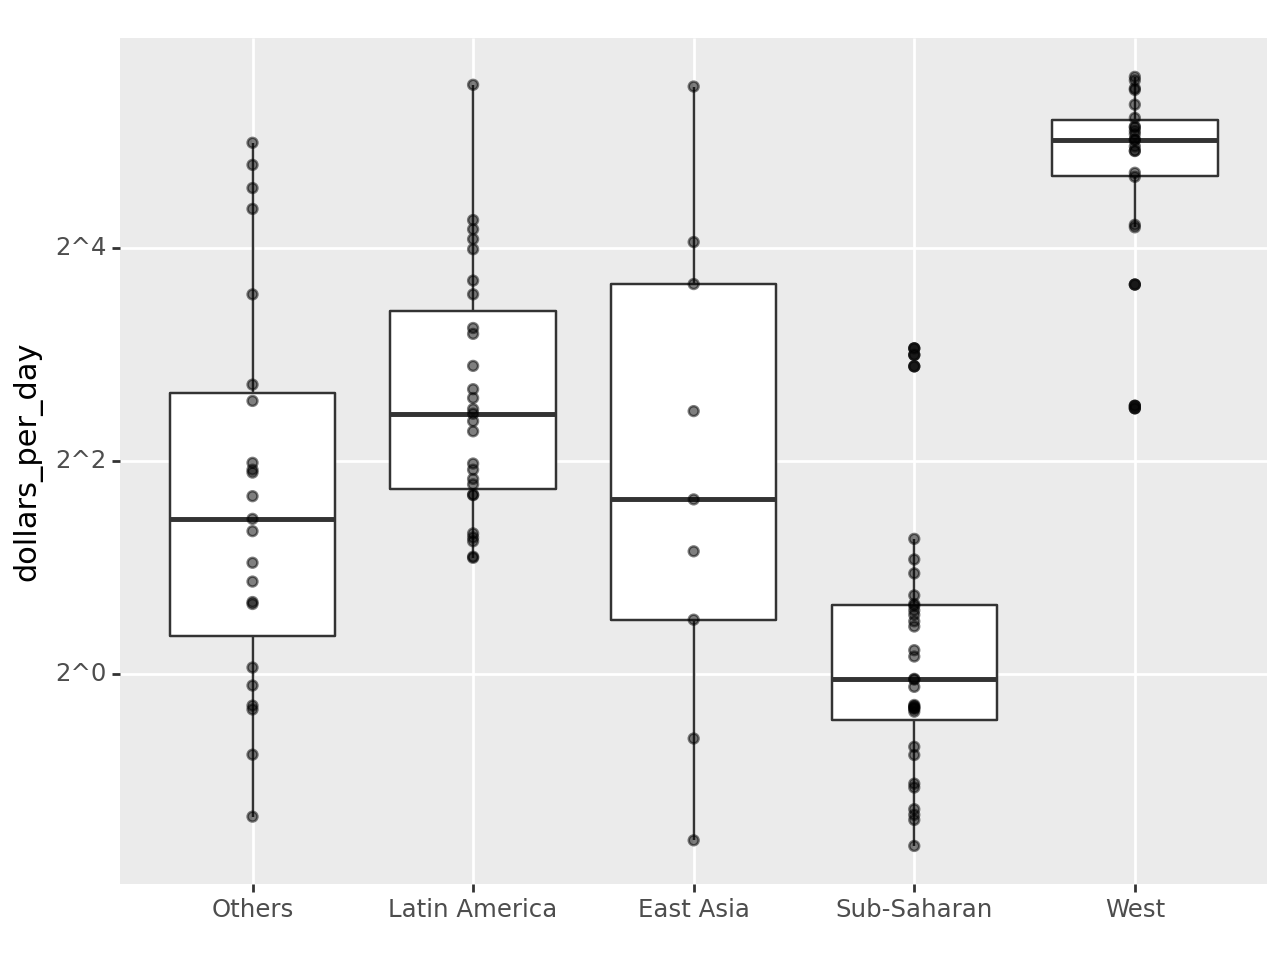

<Figure Size: (640 x 480)>

In [ ]:
filtered = grouped_gapminder[(grouped_gapminder['year'] == past_year)]

(
    pln.ggplot(filtered,
               pln.aes('group', 'dollars_per_day'))
    + pln.geom_boxplot()
    + pln.scale_y_continuous(trans='log2')
    + pln.xlab("")
    # Parece não ser suportado pelo potnine
    #+ pln.theme(axis_text_x = 'element_text(angle = 90, hjust = 1)')
    + pln.geom_point(alpha = 0.5)
)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 72 rows containing non-finite values.


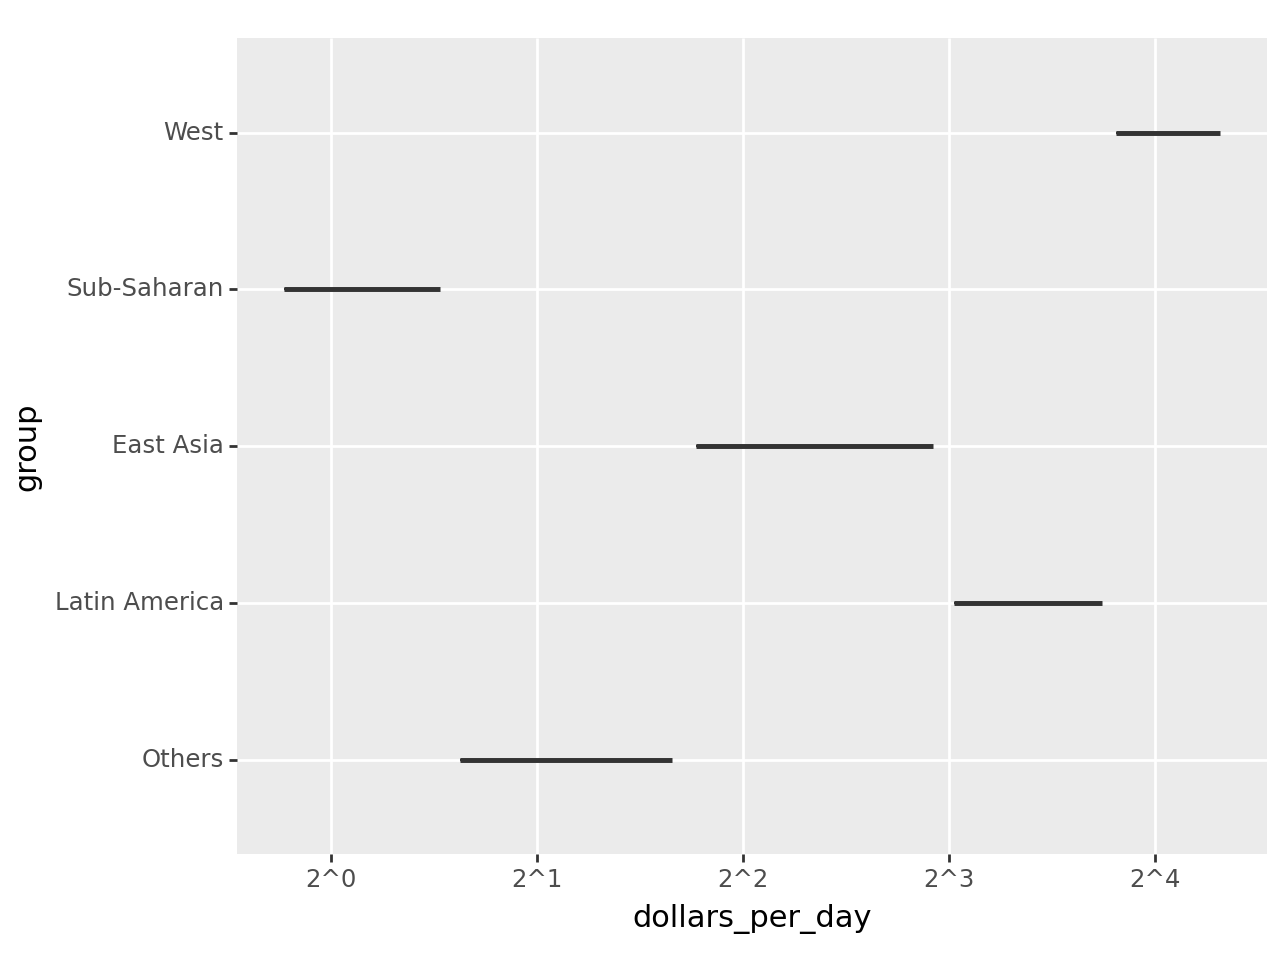

<Figure Size: (640 x 480)>

In [ ]:
filtered = grouped_gapminder[(grouped_gapminder['year'] == past_year)]

(
    pln.ggplot(filtered,
               pln.aes('dollars_per_day', 'group'))
    + pln.geom_boxplot()
    + pln.scale_x_continuous(trans='log2')
    # 'ggridges' não existe equivalente no plotnine
    #+ pln.geom_density_ridges()
)

<ipython-input-163-feeaac8ffedf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 81 rows containing non-finite values.


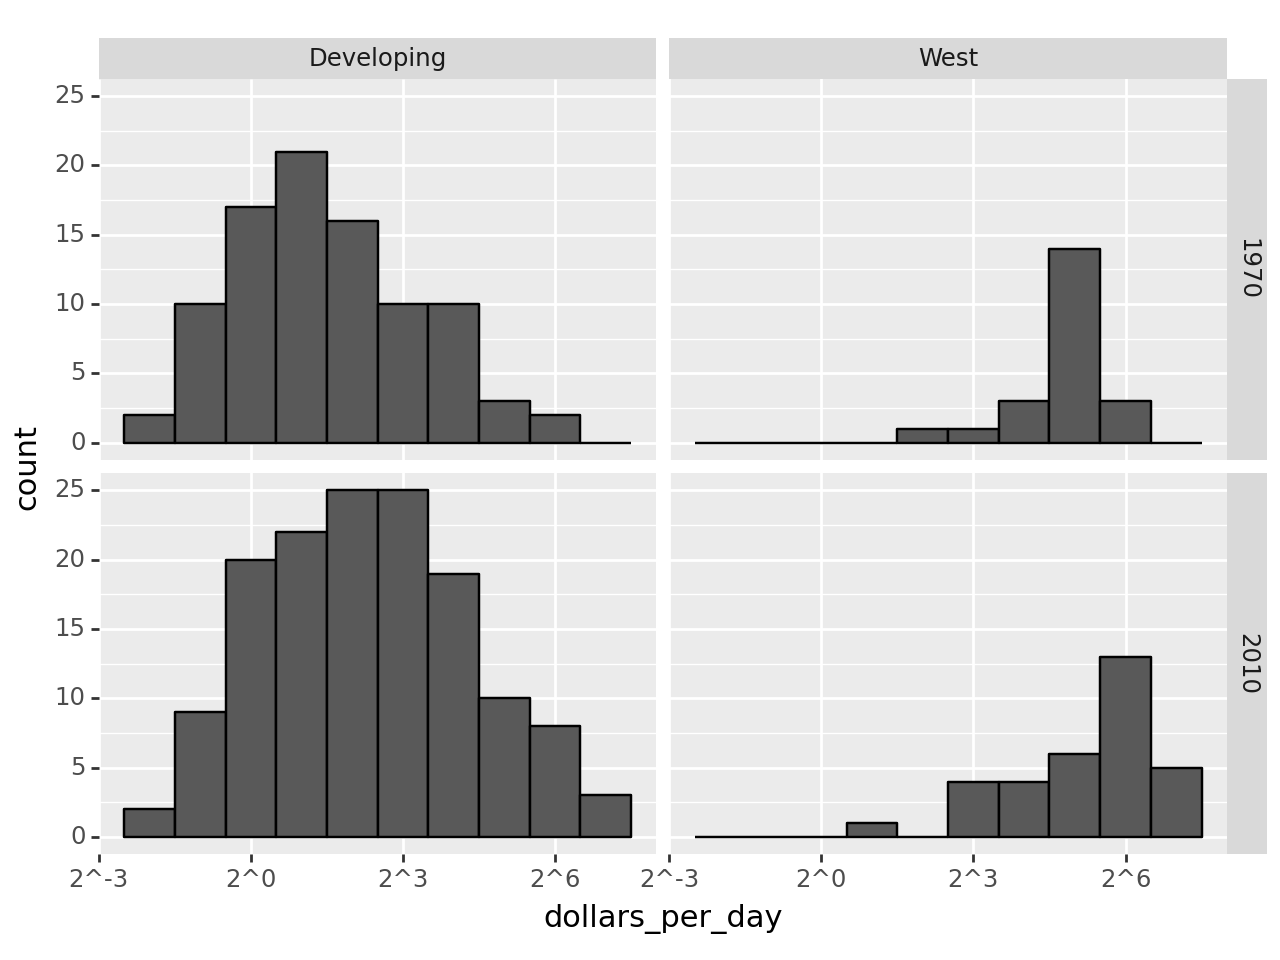

<Figure Size: (640 x 480)>

In [ ]:
past_year = 1970
present_year = 2010
years = [past_year, present_year]
filtered = grouped_gapminder[(grouped_gapminder['year'].isin(years))]

def set_west(row):
  if row['group'] == "West":
    return "West"
  else:
    return "Developing"

filtered['west'] = filtered.apply(set_west, axis=1)

(
    pln.ggplot(filtered,
               pln.aes('dollars_per_day'))
    + pln.geom_histogram(binwidth = 1, color = "black")
    + pln.scale_x_continuous(trans='log2')
    + pln.facet_grid("year ~ west")
)

In [ ]:
country_list_1 = gapminder[(gapminder['year'] == past_year) & (gapminder['dollars_per_day'].notnull())]['country']
country_list_2 = gapminder[(gapminder['year'] == present_year) & (gapminder['dollars_per_day'].notnull())]['country']

country_list = np.intersect1d(country_list_1, country_list_2)
country_list


array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahamas',
       'Bangladesh', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Botswana',
       'Brazil', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Cuba', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea-Bissau', 'Guyana', 'Honduras', 'Hong Kong, China',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kenya', 'Kiribati', 'Latvia', 'Lesotho',
       'Liberia', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Mali', 'Malta', 'Mauritania', 'Mexico', 'Morocco', 'Nepal',
       'Netherlands', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Papua

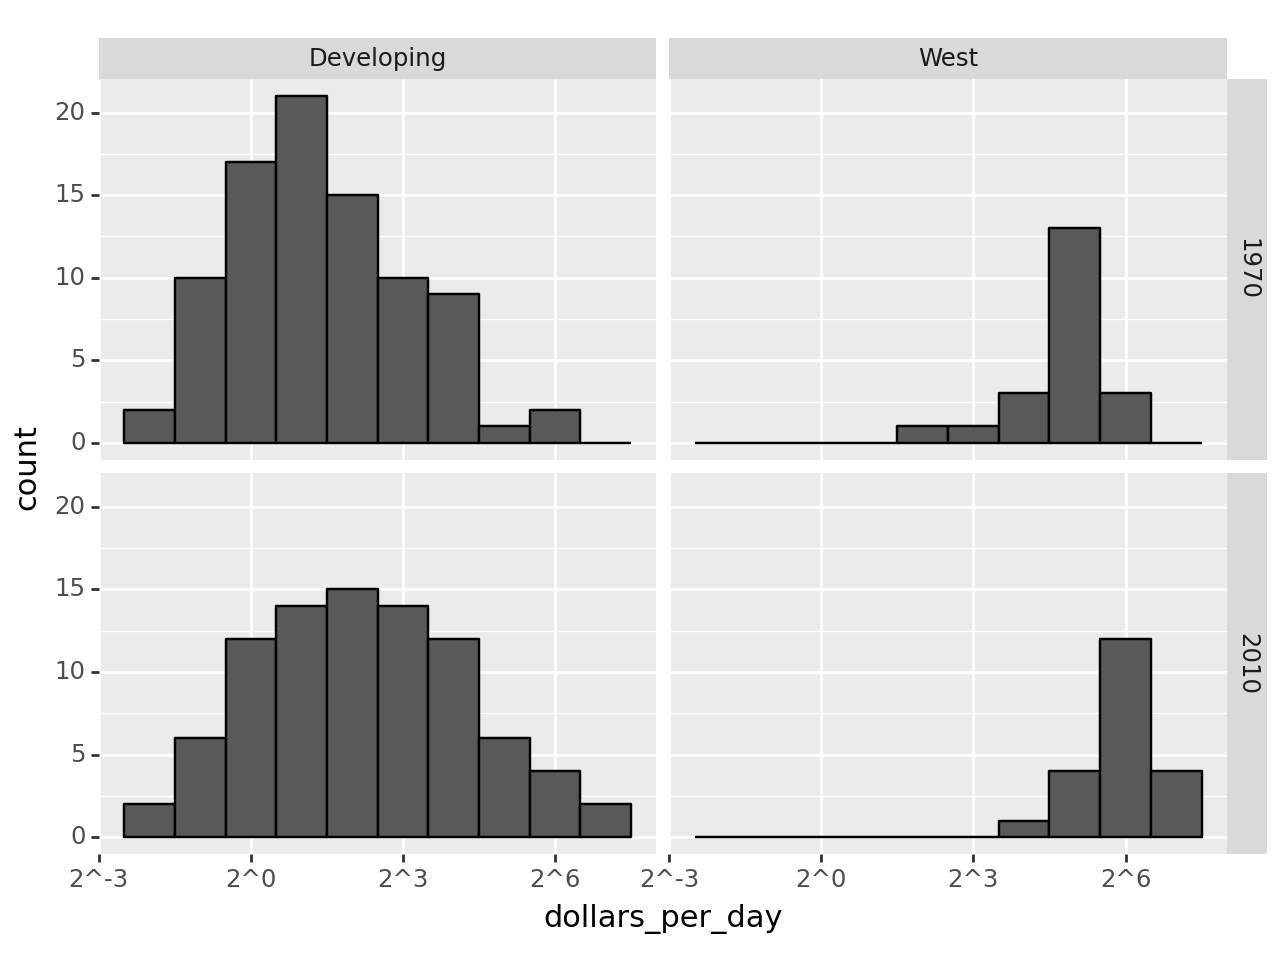

<Figure Size: (640 x 480)>

In [ ]:

filtered = filtered[(filtered['year'].isin(years)) & (filtered['country'].isin(country_list))]


(
    pln.ggplot(filtered,
               pln.aes('dollars_per_day'))
    + pln.geom_histogram(binwidth = 1, color = "black")
    + pln.scale_x_continuous(trans='log2')
    + pln.facet_grid("year ~ west")
)

<ipython-input-166-ea7bbbe5c48a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


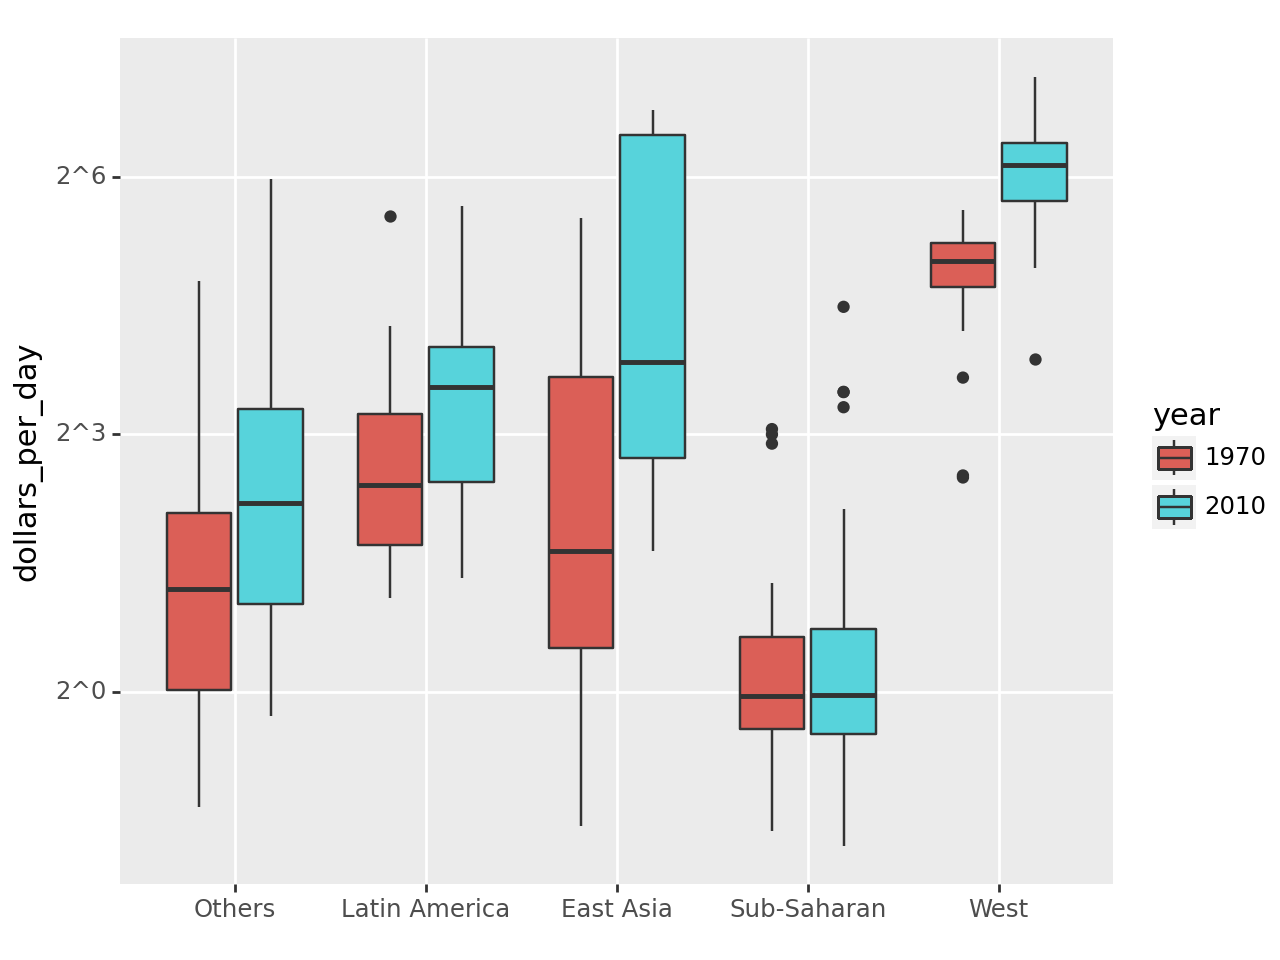

<Figure Size: (640 x 480)>

In [ ]:
filtered['year'] = filtered['year'].astype('category')
(
    pln.ggplot(filtered,
               pln.aes('group', 'dollars_per_day', fill='year'))
    + pln.geom_boxplot()
    + pln.scale_y_continuous(trans='log2')
    # Não suportado pelo plotnine
    #+ pln.theme(axis_text_x = 'element_text(angle = 90, hjust = 1)')
    + pln.xlab("")
)

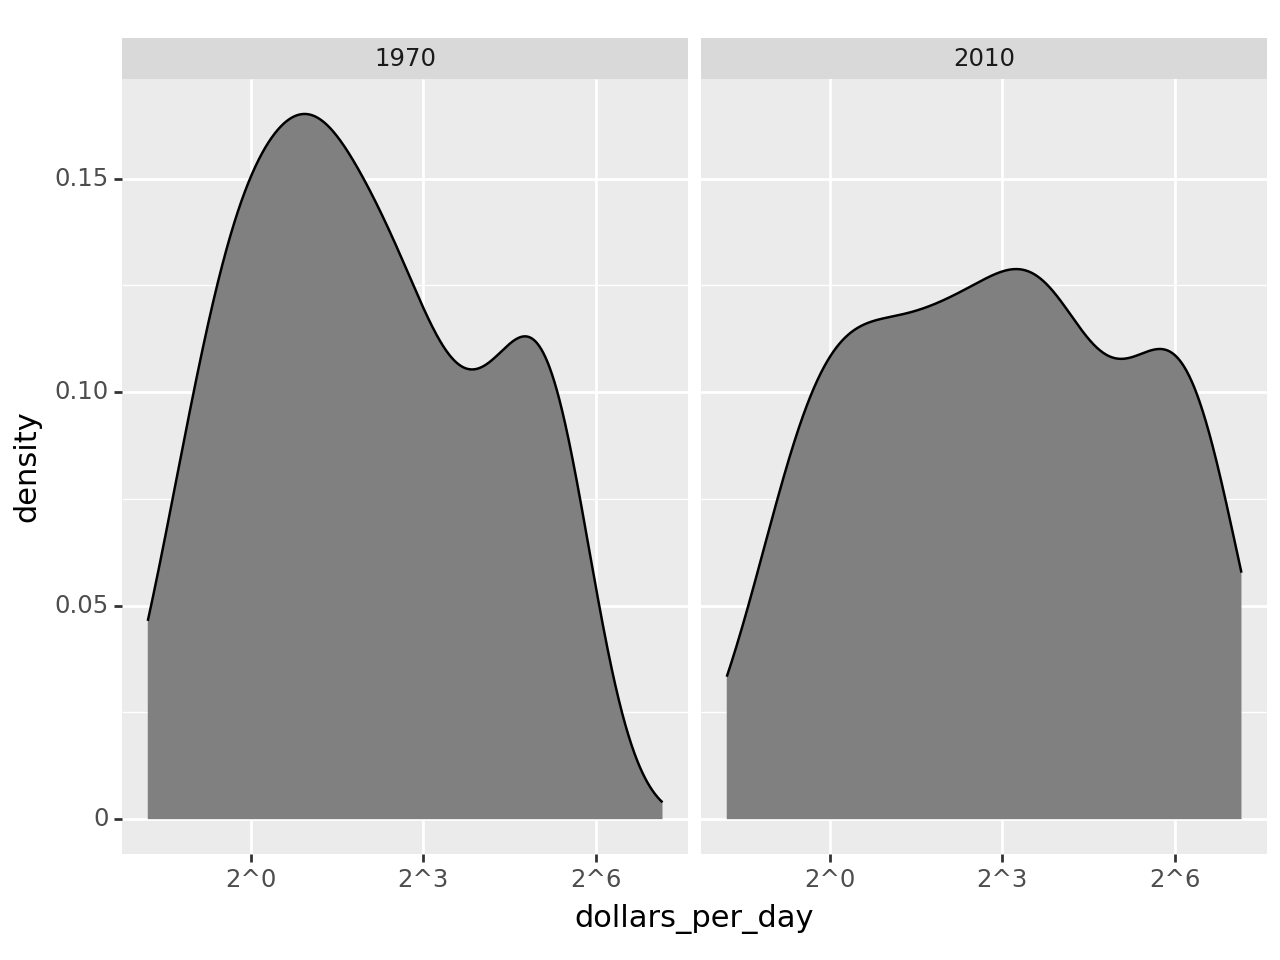

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(filtered,
               pln.aes('dollars_per_day'))
    + pln.geom_density(fill = 'grey')
    + pln.scale_x_continuous(trans='log2')
    + pln.facet_grid('. ~ year')
)

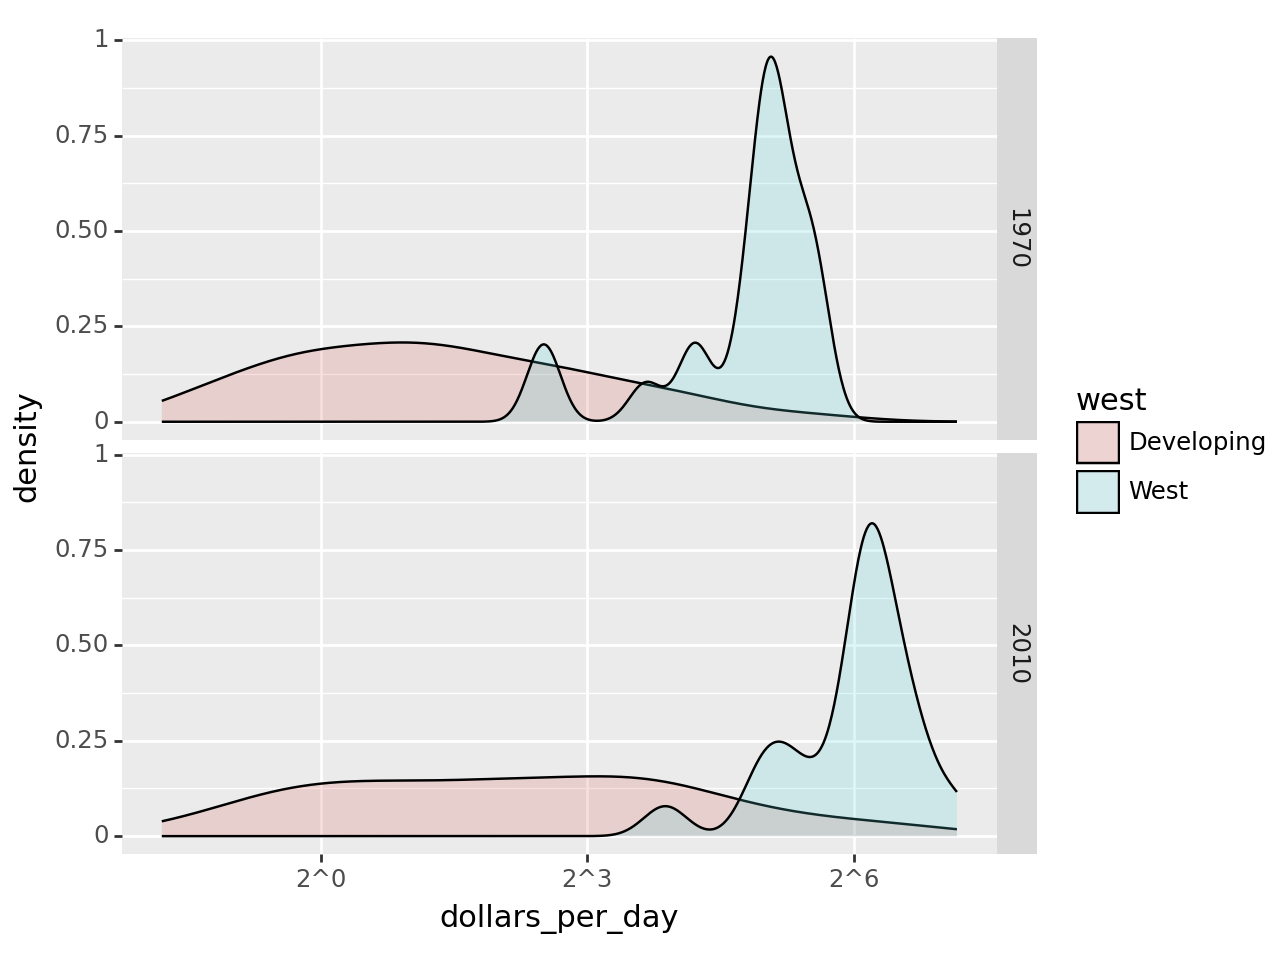

<Figure Size: (640 x 480)>

In [ ]:
(
    pln.ggplot(filtered,
               pln.aes('dollars_per_day', fill='west'))
    + pln.geom_density(alpha = 0.2)
    + pln.scale_x_continuous(trans='log2')
    + pln.facet_grid('year ~.')
)